# Eploration - Exploitation tradeoff

In this notebook we investigate:
- Whether adding exploration cycles improves the recall in the longer run despite offseting exploitation
- Whether exploration behaves in the same way as random selection
- How different strategies affect focus regions of exploitation

### Import data and general functionality

In [40]:
import os
wd = os.getcwd()

utils_nb = os.path.join(wd, "0_Utils.ipynb")
%run {utils_nb}

ModuleNotFoundError: No module named 'exs'

ModuleNotFoundError: No module named 'exs'

In [ ]:
tyk2_data = load_dataset("TYK2", "data/Tyk2_dataset.csv", "Smiles", "dG", lambda x: -(x-47.778) / (8.314e-3 * 298.15 * np.log(10)))
usp7_data = load_dataset("USP7", "data/usp.csv", "canonical smi", "IC50", lambda x: -np.log10(x) + 9)
d2r_data = load_dataset("D2R", "data/Dopamine D2 receptor.csv", 'canonical_smiles', 'pKi', lambda x: x)
mpro_data = load_dataset("Mpro", "data/Mpro.csv", 'SMILES', 'pIC50', lambda x: x)

total_2p = {
    "TYK2": tyk2_data.top_2p.sum(),
    "USP7": usp7_data.top_2p.sum(),
    "Mpro": mpro_data.top_2p.sum(),
    "D2R": d2r_data.top_2p.sum(),
}

total_5p = {
    "TYK2": tyk2_data.top_5p.sum(),
    "USP7": usp7_data.top_5p.sum(),
    "Mpro": mpro_data.top_5p.sum(),
    "D2R": d2r_data.top_5p.sum(),
}

### Define selection protocols

All protocols acquire 360 compounds in total.

- random-exploit: Directly switch to exploit after a random batch of 60 cpds
- random-explore-exploit: Acquire 60 more datapoints in an explorative fashion following the initial batch of 60
- random-eandom-exploit: Instead of using the prediction uncertainty, pick the explorative batch at random as well

In [3]:

selection_protocols = {
    "random-exploit": [("random", 60)] + [("exploit", 30)]*10,
    "random-explore-exploit": [("random", 60)] + [("explore", 30)]*2 + [("exploit", 30)]*8,
    "random-random-exploit": [("random", 120)] + [("exploit", 30)]*8,
}

In [4]:
random_seeds = [250,500,750] 

### Set up and run experiments

Make sure to use appropriate protocols for GP and Chemprop!

In [ ]:
# TODO: set up lists for these. Go to 0_Utils and implement construction of CP and CP/GP models.
DATASET = "TYK2"
MODEL = "GP"

In [ ]:
results = pd.DataFrame()
recall = pd.DataFrame()
metrics = pd.DataFrame()

In [ ]:
%%capture

# TODO: Call thee for all (some?) models and datasets. Don't do everything in one go, do a batch and pickle results.
for protocol_name, protocol in selection_protocols.items():
    for seed in random_seeds:
        
        res_df, ana = active_learning(tyk2_data, protocol, MODEL, seed)
        recall_current, metrics_current = do_analysis(res_df, ana, DATASET, MODEL, protocol_name, protocol, seed)
        res_df = tag_dataset(res_df, DATASET, MODEL, protocol_name, seed)

        recall = pd.concat([recall, recall_current])
        metrics = pd.concat([metrics, metrics_current])
        results = pd.concat([results, res_df])

In [ ]:
%%capture

import numpy as np
import pandas as pd


datasets = {
    "Mpro": mpro_data,
# #     "D2R": d2r_data,
# #     "USP7": usp7_data,
#     "TYK2": tyk2_data   
}

models = {
#     "GP": selection_protocols,
    "CP": selection_protocols
}


results = pd.DataFrame()
recall = pd.DataFrame()
metrics = pd.DataFrame()

# Loop through all datasets and models
for DATASET, data in datasets.items():
    for MODEL, protocols in models.items():
        for protocol_name, protocol in protocols.items():
            for seed in random_seeds:
                
                # Perform active learning
                res_df, ana = active_learning(data, protocol, MODEL, seed)
                # Analyze the results
                recall_current, metrics_current = do_analysis(res_df, ana, DATASET, MODEL, protocol_name, protocol, seed)
                
                # Tagging datasets for each result
                res_df = tag_dataset(res_df, DATASET, MODEL, protocol_name, seed)
                recall_current = tag_dataset(recall_current, DATASET, MODEL, protocol_name, seed)
                metrics_current = tag_dataset(metrics_current, DATASET, MODEL, protocol_name, seed)
                
                # Concatenate results
                recall = pd.concat([recall, recall_current])
                metrics = pd.concat([metrics, metrics_current])
                results = pd.concat([results, res_df])
                
                # Print results for this iteration
                print(f"Finished {DATASET} with {MODEL} model using {protocol_name} protocol and seed {seed}.")




In [ ]:
import numpy as np
import pandas as pd
results = pd.read_pickle("data/3_results/combined_results_all.pkl")
recall = pd.read_pickle("data/3_results/combined_recall_all.pkl")
metrics = pd.read_pickle("data/3_results/combined_metrics_all.pkl")

In [ ]:
import pandas as pd

In [ ]:
!pip install --upgrade scikit-learn==1.2.2

     |████████████████████████████████| 9.0 MB 2.9 MB/s eta 0:00:01     |████████▌                       | 2.4 MB 1.3 MB/s eta 0:00:05     |██████████████▍                 | 4.1 MB 2.9 MB/s eta 0:00:02███████████████▌      | 7.2 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 5.8 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0
    Uninstalling scikit-learn-1.0:
      Successfully uninstalled scikit-learn-1.0


In [ ]:
# !pip install --upgrade numpy==1.22.4
# !pip install --upgrade seaborn==0.12.2
!pip install --upgrade matplotlib==3.7.1
!pip install --upgrade matplotlib-inline==0.1.6



     |████████████████████████████████| 7.4 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 25.2 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
  Using cached matplotlib_inline-0.1.6-py3-none-any.whl (9.4 kB)
  Attempting uninstall: matplotlib-inline
    Found existing installation: matplotlib-inline 0.1.3
    Uninstalling matplotlib-inline-0.1.3:
      Successfully uninstalled matplotlib-inline-0.1.3


In [1]:
import numpy as np
import pandas as pd
results = pd.read_pickle("data/3_results/final_combined_results_upd.pkl")
recall = pd.read_pickle("data/3_results/final_combined_recall_upd.pkl")
metrics = pd.read_pickle("data/3_results/final_combined_metrics_upd.pkl")

In [2]:

metrics = pd.read_pickle("data/3_results/final_combined_metrics.pkl")
metrics

set  cycle         R2  Spearman      RMSE Dataset Model   
0      pool      0 -30.353370       NaN  7.628256    TYK2    CP  \
1      pool      1   0.033241  0.343535  1.339114    TYK2    CP   
2      pool      2   0.039430  0.235685  1.334832    TYK2    CP   
3      pool      3   0.018635  0.241004  1.350164    TYK2    CP   
4      pool      4   0.079560  0.345023  1.307780    TYK2    CP   
...     ...    ...        ...       ...       ...     ...   ...   
1651  train      4   0.999588  0.997007  0.028337    USP7    GP   
1652  train      5   0.999619  0.995811  0.026439    USP7    GP   
1653  train      6   0.999586  0.995649  0.026833    USP7    GP   
1654  train      7   0.999046  0.993763  0.039357    USP7    GP   
1655  train      8   0.999069  0.994083  0.037577    USP7    GP   

                   Protocol  seed  compounds_acquired dataset model  
0            random-exploit   250                  60     NaN   NaN  
1            random-exploit   250                  90     NaN   NaN  
2            random-exploit   250                 120     NaN   NaN  
3            random-exploit   250                 150     NaN   NaN  
4            random-exploit   250                 180     NaN   NaN  
...                     ...   ...                 ...     ...   ...  
1651  random-random-exploit   750                 240    USP7    GP  
1652  random-random-exploit   750                 270    USP7    GP  
1653  random-random-exploit   750                 300    USP7    GP  
1654  random-random-exploit   750                 330    USP7    GP  
1655  random-random-exploit   750                 360    USP7    GP  

[1656 rows x 12 columns]

In [ ]:
if not metrics.empty:
    first_cycle_compounds = metrics['compounds_acquired'].iloc[0]  
    metrics['compounds_acquired'] = metrics['compounds_acquired'] - first_cycle_compounds

### Loading all pickles and combining into one

In [ ]:
import pandas as pd

base_path = "data/3_results/"

# Load the provided files
cp_metrics = pd.read_pickle(f"{base_path}combined_metrics_all_no_null.pkl")
cp_metrics1 = pd.read_pickle(f"{base_path}combined_metrics_all_null.pkl")
cp_recall = pd.read_pickle(f"{base_path}combined_recall_all_no_null.pkl")
cp_recall1 = pd.read_pickle(f"{base_path}combined_recall_all_null.pkl")
cp_results = pd.read_pickle(f"{base_path}combined_results_all_no_null.pkl")
cp_results1 = pd.read_pickle(f"{base_path}combined_results_all_null.pkl")
combined_metrics = pd.read_pickle(f"{base_path}combined_metrics_all.pkl")
combined_recall = pd.read_pickle(f"{base_path}combined_recall_all.pkl")
combined_results = pd.read_pickle(f"{base_path}combined_results_all.pkl")

# Filter out the CP model from the combined files
combined_metrics = combined_metrics[combined_metrics['Model'] != 'CP']
combined_recall = combined_recall[combined_recall['Model'] != 'CP']
combined_results = combined_results[combined_results['Model'] != 'CP']
combined_metrics = combined_metrics[combined_metrics['Protocol'] != 'random-explore']
combined_recall = combined_recall[combined_recall['Protocol'] != 'random-explore']
combined_results = combined_results[combined_results['Protocol'] != 'random-explore']

cp_metrics = cp_metrics[cp_metrics['Model'] != 'GP']
cp_recall = cp_recall[cp_recall['Model'] != 'GP']
cp_results = cp_results[cp_results['Model'] != 'GP']
cp_metrics1 = cp_metrics1[cp_metrics1['Model'] != 'GP']
cp_recall1 = cp_recall1[cp_recall1['Model'] != 'GP']
cp_results1 = cp_results1[cp_results1['Model'] != 'GP']
# Combine the dataframes
final_metrics = pd.concat([cp_metrics,cp_metrics1, combined_metrics], ignore_index=True)
final_recall = pd.concat([cp_recall,cp_recall1,combined_recall], ignore_index=True)
final_results = pd.concat([cp_results,cp_results1, combined_results], ignore_index=True)

# Save the combined dataframes to the base path with new names
final_metrics.to_pickle(f"{base_path}final_combined_metrics_upd.pkl")
final_recall.to_pickle(f"{base_path}final_combined_recall_upd.pkl")
final_results.to_pickle(f"{base_path}final_combined_results_upd.pkl")

print("Dataframes combined and saved successfully!")


Dataframes combined and saved successfully!


## Analysis

Recall and R2 go to the paper. Feature maps show trends where a certain model / protocol likes to pick cpds, a selection of them goes to main, rest to SI.

In [ ]:
recall_for_plot = make_recall_for_plot(recall, total_2p, total_5p)

In [ ]:
recall_for_plot

index selected_in_cycle  top_2p  top_5p Dataset Model        Protocol  \
0       0.0                 0     2.0     3.0    TYK2    CP  random-exploit   
1       1.0                 1     1.0     1.0    TYK2    CP  random-exploit   
2       2.0                 2     0.0     0.0    TYK2    CP  random-exploit   
3       3.0                 3     1.0     2.0    TYK2    CP  random-exploit   
4       4.0                 4     1.0     1.0    TYK2    CP  random-exploit   
...     ...               ...     ...     ...     ...   ...             ...   
1008    NaN               NaN     NaN     NaN     D2R    GP        Baseline   
1009    NaN               NaN     NaN     NaN     D2R    CP        Baseline   
1010    NaN               NaN     NaN     NaN     D2R    GP        Baseline   
1011    NaN               NaN     NaN     NaN     D2R    CP        Baseline   
1012    NaN               NaN     NaN     NaN     D2R    GP        Baseline   

       seed  Compounds acquired  top_2p_cum  ...  baseline_2p  baseline_5p  \
0     250.0                60.0         2.0  ...          1.2          3.0   
1     250.0                90.0         3.0  ...          1.8          4.5   
2     250.0               120.0         3.0  ...          2.4          6.0   
3     250.0               150.0         4.0  ...          3.0          7.5   
4     250.0               180.0         5.0  ...          3.6          9.0   
...     ...                 ...         ...  ...          ...          ...   
1008    NaN               300.0         NaN  ...          NaN          NaN   
1009    NaN               330.0         NaN  ...          NaN          NaN   
1010    NaN               330.0         NaN  ...          NaN          NaN   
1011    NaN               360.0         NaN  ...          NaN          NaN   
1012    NaN               360.0         NaN  ...          NaN          NaN   

      normalised_2p  normalised_5p  dataset model   F1 (2%)  Recall (2%)  \
0          0.402414       0.000000      NaN   NaN  0.015385        0.010   
1          0.605449      -0.100908      NaN   NaN  0.020690        0.015   
2          0.303644      -0.404858      NaN   NaN  0.018750        0.015   
3          0.507614      -0.304569      NaN   NaN  0.022857        0.020   
4          0.712831      -0.407332      NaN   NaN  0.026316        0.025   
...             ...            ...      ...   ...       ...          ...   
1008            NaN            NaN      NaN   NaN       NaN          NaN   
1009            NaN            NaN      NaN   NaN       NaN          NaN   
1010            NaN            NaN      NaN   NaN       NaN          NaN   
1011            NaN            NaN      NaN   NaN       NaN          NaN   
1012            NaN            NaN      NaN   NaN       NaN          NaN   

       F1 (5%)  Recall (5%)  
0     0.010714        0.006  
1     0.013559        0.008  
2     0.012903        0.008  
3     0.018462        0.012  
4     0.020588        0.014  
...        ...          ...  
1008  0.035294        0.120  
1009  0.036264        0.132  
1010  0.036264        0.132  
1011  0.037113        0.144  
1012  0.037113        0.144  

[1013 rows x 21 columns]

In [ ]:
font_sizes = {
    "axes.labelsize": 15,   # Axis labels
    "axes.titlesize": 16,   # Title
    "xtick.labelsize": 15,  # X-axis tick labels
    "ytick.labelsize": 16,  # Y-axis tick labels
    "legend.fontsize": 12,  # Legend
    "font.size": 14         # General font size
}



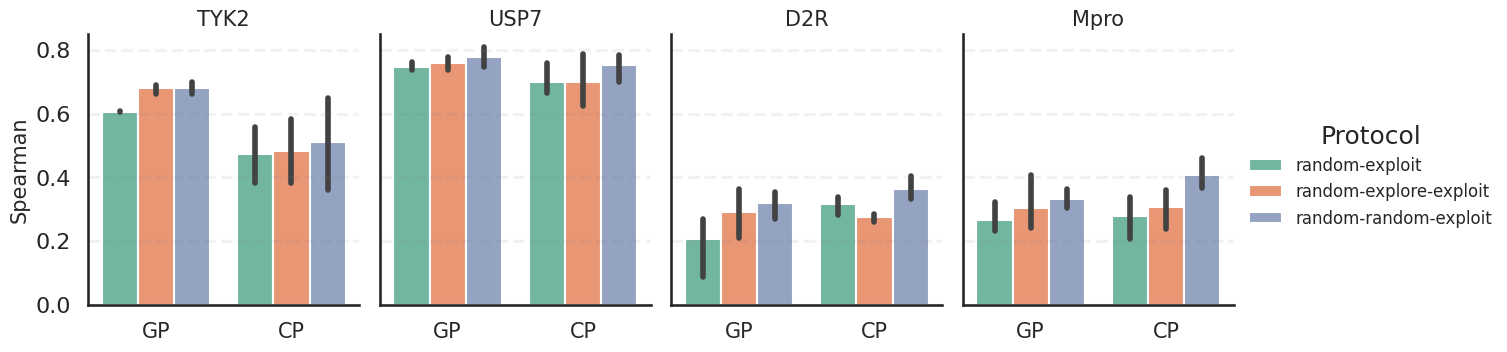

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

PROTOCOL_ORDER = ['random-exploit','random-explore-exploit', 'random-random-exploit']
DATASET_ORDER = ["TYK2", "USP7", "D2R", "Mpro"]
MODEL_ORDER = ['GP', 'CP']

filtered_df = metrics[(metrics['set'] == "pool") & (metrics['compounds_acquired'] == 360) & (metrics['Protocol'] != 'random-explore')]
selected_df = filtered_df[['Spearman', 'Dataset', 'Model', 'Protocol']]

# Plotting
sns.set_style("white")
sns.set_context("talk", rc=font_sizes)
color_palette = sns.color_palette("Set2", len(selected_df['Protocol'].unique()))  # Adjusted for the number of unique protocols

g = sns.catplot(data=selected_df, x="Model", y="Spearman", col="Dataset", hue="Protocol", kind="bar", sharey=True,
                errorbar=("ci", 95), hue_order=PROTOCOL_ORDER, col_order=DATASET_ORDER, order=MODEL_ORDER, height=4, aspect=0.8, palette=color_palette)

# Set consistent y-axis scales and other aesthetics
for i, ax in enumerate(g.axes.flat):
    if i < 4:  # For the first two subplots
        ax.set_ylim(0, 0.85)
        ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
#     else:  # For the last two subplots
#         ax.set_ylim(0, 0.6)
#         ax.set_yticks([0, 0.2, 0.4, 0.6])
    for y in ax.get_yticks():
        ax.axhline(y, color='gray', linestyle='dashed', alpha=0.1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

g.set_titles(template='{col_name}')
g.set_axis_labels("", "Spearman")
sns.despine()

plt.show()


In [ ]:
import seaborn as sns
sns.set()

def make_plot_recall(y: str):
    g = sns.relplot(data=recall_for_plot, x="Compounds acquired", y=y, col="Dataset", style="Model", hue="Protocol", kind="line", facet_kws={"sharey": False}, col_order=DATASET_ORDER, style_order=MODEL_ORDER, height=3, palette = ["tab:blue", "tab:orange", "tab:green", "k"])
    g.set_titles(template='{col_name}')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_context("talk", rc=font_sizes)
DATASET_ORDER = ["TYK2", "USP7", "D2R", "Mpro"]
MODEL_ORDER = ['GP', 'CP']
PROTOCOL_ORDER =['random-exploit','random-explore-exploit', 'random-random-exploit', 'Baseline']

# Defining palette with Set2 and adding black for 'Baseline'
palette = sns.color_palette("Set2", len(PROTOCOL_ORDER) - 1)
palette.append('black')

def make_plot_recall(y: str):
    
    g = sns.relplot(data=recall_for_plot, 
                    x="Compounds acquired", 
                    y=y, 
                    hue="Protocol",
                    row="Model", 
                    col="Dataset", 
                    kind="line", 
                    height=3, 
                    aspect=1.2,
                    facet_kws={"sharey": False, "sharex": True},
                    hue_order=PROTOCOL_ORDER,
                    row_order=MODEL_ORDER,
                    col_order=DATASET_ORDER,
                    linewidth=2.5,
                    palette=palette
                    )
    
    # Remove default titles
    g.set_titles("")
    
    # Set column headers only for the top row
    for ax, title in zip(g.axes[0], DATASET_ORDER):
        ax.set_title(title)
    
    # Set row headers only for the first column and rotate them by 90 degrees
    for ax, row_name in zip(g.axes[:,0], MODEL_ORDER):
        ax.annotate(row_name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center', rotation=90)
    
    g.set_axis_labels("Compounds acquired", "Recall (2%)")
    g.tight_layout()
    
    # Add guiding lines
    for i, ax in enumerate(g.axes.flat):
        if i in [3, 7]:  # Indices for 'Mpro'
            for y in [0,0.25, 0.5, 0.75, 1]:
                ax.axhline(y, color='gray', linestyle='dashed', alpha=0.1)
        else:
            for y in [0,0.2, 0.4, 0.6]:
                ax.axhline(y, color='gray', linestyle='dashed', alpha=0.1)
        
        # Add vertical lines and ticks at 100, 200, and 300 compounds
        for x in [100, 200, 300]:
            ax.axvline(x, color='gray', linestyle='dashed', alpha=0.1)
#             ax.set_xticks(list(ax.get_xticks()) + [x])

    plt.subplots_adjust(top=0.92)
    g.fig.suptitle('')  # Remove the super title

    plt.show()



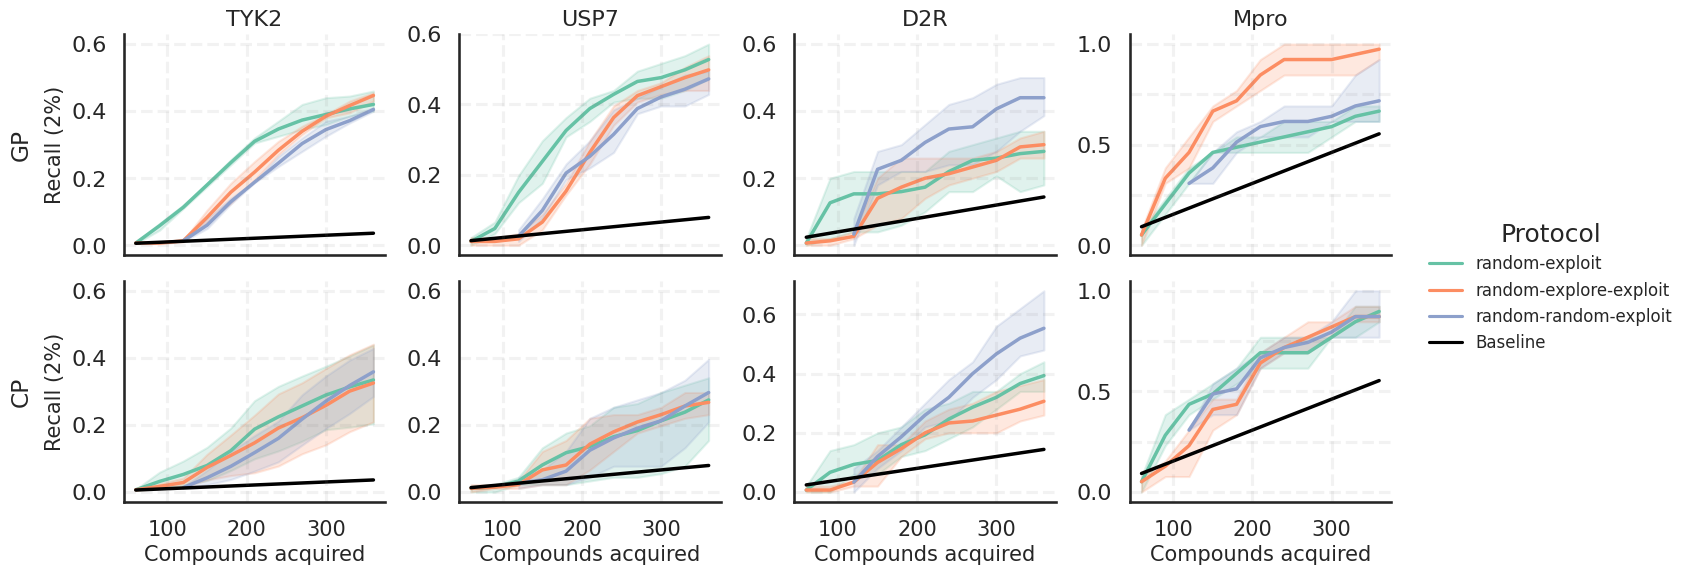

In [ ]:
make_plot_recall("Recall (2%)")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_context("talk", rc=font_sizes)
DATASET_ORDER = ["TYK2", "USP7", "D2R", "Mpro"]
MODEL_ORDER = ['GP', 'CP']
PROTOCOL_ORDER =['random-exploit','random-explore-exploit', 'random-random-exploit', 'Baseline']

# Defining palette with Set2 and adding black for 'Baseline'
palette = sns.color_palette("Set2", len(PROTOCOL_ORDER) - 1)
palette.append('black')

def make_plot_recall(y: str):
    
    g = sns.relplot(data=recall_for_plot, 
                    x="Compounds acquired", 
                    y=y, 
                    hue="Protocol",
                    row="Model", 
                    col="Dataset", 
                    kind="line", 
                    height=3, 
                    aspect=1.2,
                    facet_kws={"sharey": False, "sharex": True},
                    hue_order=PROTOCOL_ORDER,
                    row_order=MODEL_ORDER,
                    col_order=DATASET_ORDER,
                    linewidth=2.5,
                    palette=palette
                    )
    
    # Remove default titles
    g.set_titles("")
    
    # Set column headers only for the top row
    for ax, title in zip(g.axes[0], DATASET_ORDER):
        ax.set_title(title)
    
    # Set row headers only for the first column and rotate them by 90 degrees
    for ax, row_name in zip(g.axes[:,0], MODEL_ORDER):
        ax.annotate(row_name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center', rotation=90)
    
    g.set_axis_labels("Compounds acquired", y)
    g.tight_layout()
    
    # Add guiding lines
    for i, ax in enumerate(g.axes.flat):
        if i in [3, 7]:  # Indices for 'Mpro'
            for y in [0,0.25, 0.5, 0.75, 1]:
                ax.axhline(y, color='gray', linestyle='dashed', alpha=0.1)
        else:
            for y in [0,0.2, 0.4, 0.6]:
                ax.axhline(y, color='gray', linestyle='dashed', alpha=0.1)
        
        # Add vertical lines and ticks at 100, 200, and 300 compounds
        for x in [100, 200, 300]:
            ax.axvline(x, color='gray', linestyle='dashed', alpha=0.1)
#             ax.set_xticks(list(ax.get_xticks()) + [x])

    plt.subplots_adjust(top=0.92)
    g.fig.suptitle('')  # Remove the super title

    plt.show()



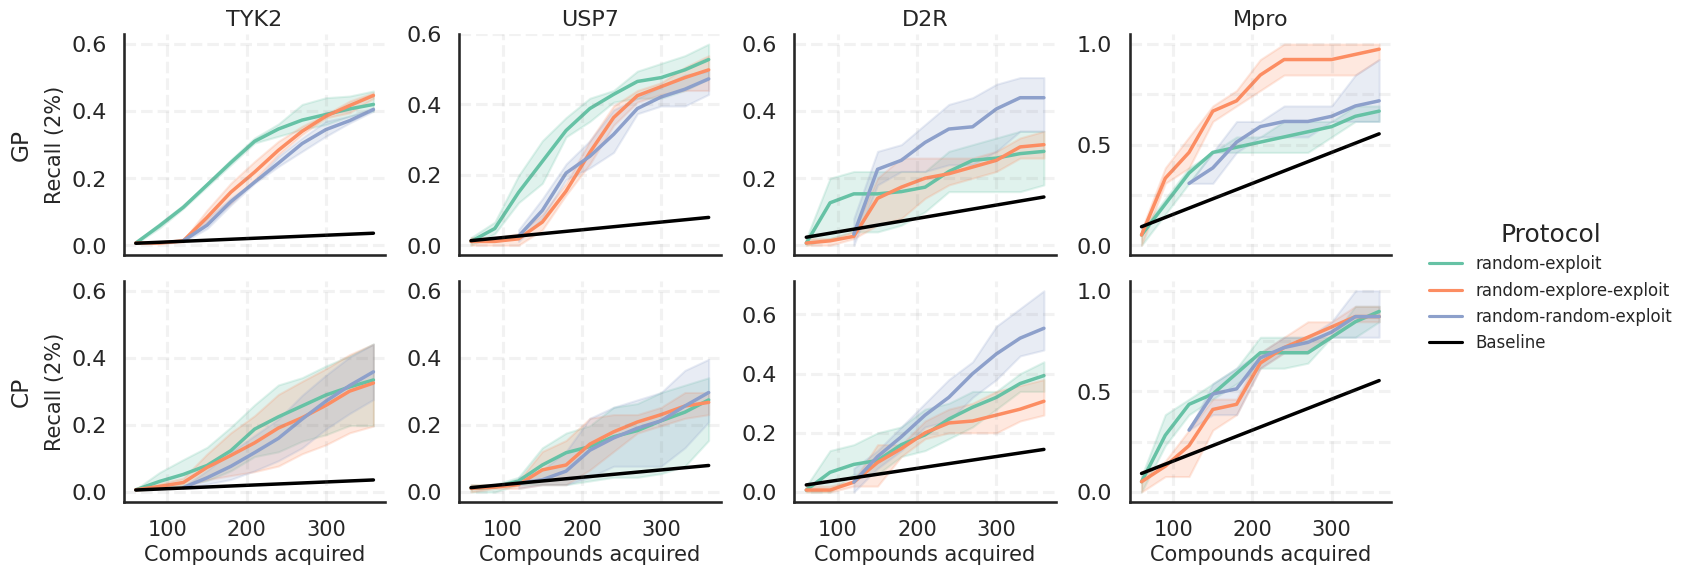

In [ ]:
make_plot_recall("Recall (2%)")

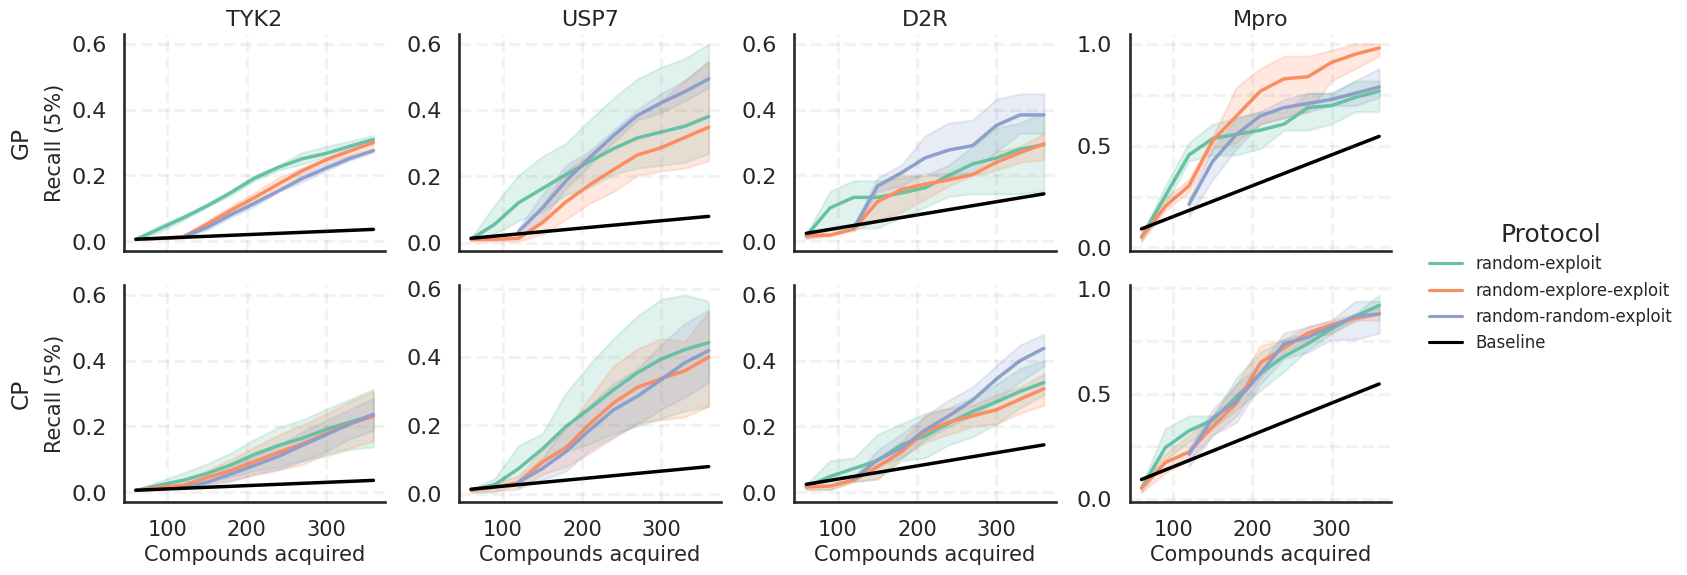

In [ ]:
make_plot_recall("Recall (5%)")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_context("talk", rc=font_sizes)
DATASET_ORDER = ["TYK2", "USP7", "D2R", "Mpro"]
MODEL_ORDER = ['GP', 'CP']
PROTOCOL_ORDER =['random-exploit','random-explore-exploit', 'random-random-exploit', 'Baseline']

# Defining palette with Set2 and adding black for 'Baseline'
palette = sns.color_palette("Set2", len(PROTOCOL_ORDER) - 1)
palette.append('black')

def make_plot_recall(y: str):
    
    g = sns.relplot(data=recall_for_plot, 
                    x="Compounds acquired", 
                    y=y, 
                    hue="Protocol",
                    row="Model", 
                    col="Dataset", 
                    kind="line", 
                    height=3, 
                    aspect=1.2,
                    facet_kws={"sharey": False, "sharex": True},
                    hue_order=PROTOCOL_ORDER,
                    row_order=MODEL_ORDER,
                    col_order=DATASET_ORDER,
                    linewidth=2.5,
                    palette=palette
                    )
    
    # Remove default titles
    g.set_titles("")
    
    # Set column headers only for the top row
    for ax, title in zip(g.axes[0], DATASET_ORDER):
        ax.set_title(title)
    
    # Set row headers only for the first column and rotate them by 90 degrees
    for ax, row_name in zip(g.axes[:,0], MODEL_ORDER):
        ax.annotate(row_name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center', rotation=90)
    
    g.set_axis_labels("Compounds acquired", y)
    g.tight_layout()
    
    # Add guiding lines
    for i, ax in enumerate(g.axes.flat):
        if i in [0,1,2,3,4,5,6, 7]:  # Indices for 'Mpro'
            for y in [0,0.1, 0.2, 0.3,0.4,0.5]:
                ax.axhline(y, color='gray', linestyle='dashed', alpha=0.1)
        else:
            for y in [0,0.2, 0.4, 0.6]:
                ax.axhline(y, color='gray', linestyle='dashed', alpha=0.1)
        
        # Add vertical lines and ticks at 100, 200, and 300 compounds
        for x in [100, 200, 300]:
            ax.axvline(x, color='gray', linestyle='dashed', alpha=0.1)
#             ax.set_xticks(list(ax.get_xticks()) + [x])

    plt.subplots_adjust(top=0.92)
    g.fig.suptitle('')  # Remove the super title

    plt.show()



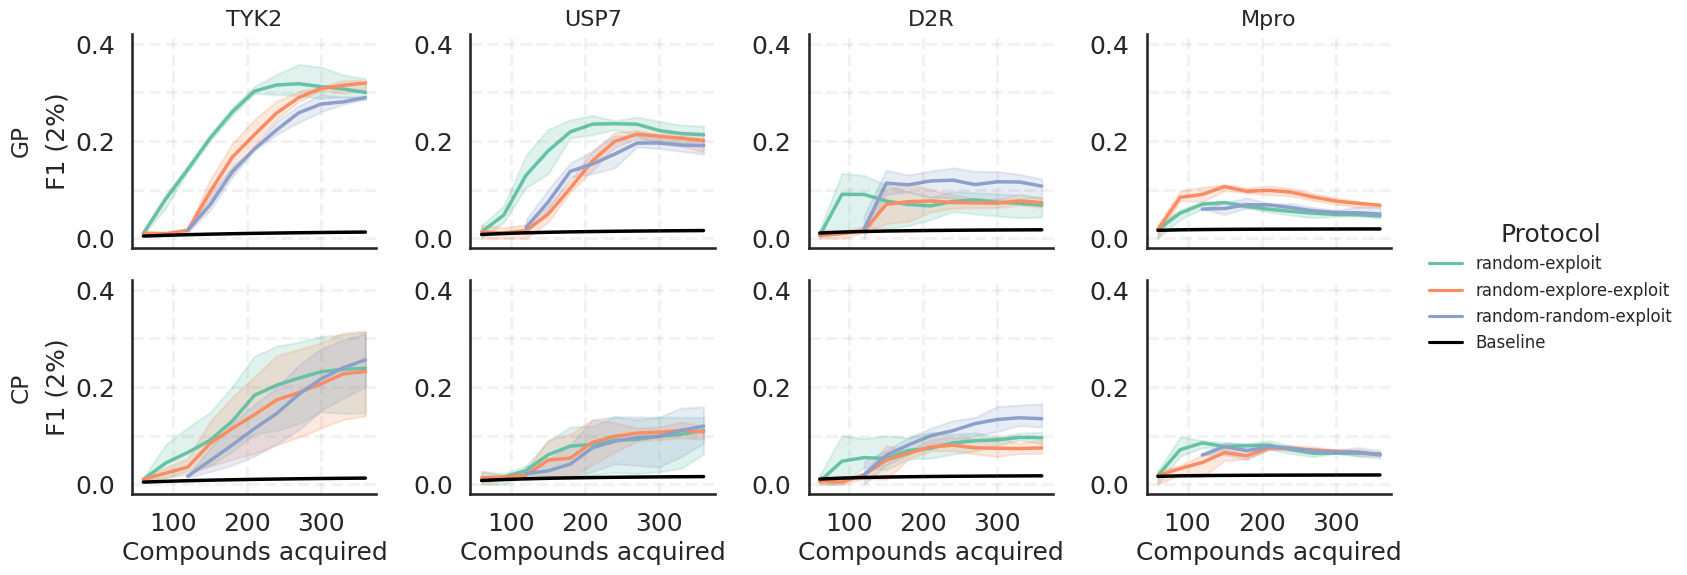

In [ ]:
make_plot_recall("F1 (2%)")

In [ ]:
make_plot_recall("F1 (5%)")

In [ ]:
import pickle

def plot_cpds_found_on_fmap(results: pd.DataFrame, dataset: str, set = "top_2p", model=None, protocol_name=None, noise_level=None, ax=None, xlabel=None, ylabel=None, legend=False, cycle=None):

    df = results[results.Dataset == dataset].reset_index(drop=True)

    if model is not None:
        df = df[df.Model == model].reset_index(drop=True)

    if protocol_name is not None:
        df = df[df.Protocol == protocol_name].reset_index(drop=True)

    if noise_level is not None:
        df = df[df.noise_level == noise_level].reset_index(drop=True)

    df = df.dropna(axis="columns")

    df["selected"] = 0
    if cycle is None:
        n_cycles = len(df.set.columns)-1
    else: 
        n_cycles = cycle
    df.loc[df[("set", n_cycles)] == "train", "selected"] = 1

    df = df[["SMILES","top_2p", "selected"]]
    df = df.groupby(["SMILES"]).mean().reset_index()


    
    df = df.sort_values(by="SMILES").reset_index(drop=True)
    df["selected"] = df.selected.apply(lambda x: round(x, 2))

    df.loc[df.top_2p == False, "selected"]  = -1

    with open(f"data/feature_maps/{dataset}.pkl", "rb") as fmap_file:
        feature_map = pickle.load(fmap_file)

    levels = len(df.selected.unique()) - 1
    zorder_sel ={k/(levels-1)+1: k for k in range(levels)}
    zorder = {"not in top 2%": 0, **zorder_sel}

    plot_chemical_space(df, feature_map, set_col="selected",  \
                    set_colors={-1: "gray"}, zorder=zorder, cmap="copper_r", markersize=10, ax=ax, labels={-1: "not in top 2%"}, set_markersize=10, xlabel=xlabel, ylabel=ylabel, legend=legend)

In [8]:
from typing import Any, List
def cycles_to_cpds(protocol: List[Any], cycle: int) -> int:
     try:
         return sum([p[1] for p in protocol[:cycle]])
     except:
         return None

metrics = metrics[metrics.Protocol != 'random-explore']
metrics = metrics[metrics.cycle > 0]
metrics["compounds_acquired"] = metrics.apply(lambda row:
cycles_to_cpds(selection_protocols[row.Protocol], row.cycle), axis=1)

In [9]:
metrics

set  cycle        R2  Spearman      RMSE Dataset Model   
1      pool      1  0.033241  0.343535  1.339114    TYK2    CP  \
2      pool      2  0.039430  0.235685  1.334832    TYK2    CP   
3      pool      3  0.018635  0.241004  1.350164    TYK2    CP   
4      pool      4  0.079560  0.345023  1.307780    TYK2    CP   
5      pool      5  0.091837  0.353118  1.299680    TYK2    CP   
...     ...    ...       ...       ...       ...     ...   ...   
1651  train      4  0.999588  0.997007  0.028337    USP7    GP   
1652  train      5  0.999619  0.995811  0.026439    USP7    GP   
1653  train      6  0.999586  0.995649  0.026833    USP7    GP   
1654  train      7  0.999046  0.993763  0.039357    USP7    GP   
1655  train      8  0.999069  0.994083  0.037577    USP7    GP   

                   Protocol  seed  compounds_acquired dataset model  
1            random-exploit   250                  60     NaN   NaN  
2            random-exploit   250                  90     NaN   NaN  
3            random-exploit   250                 120     NaN   NaN  
4            random-exploit   250                 150     NaN   NaN  
5            random-exploit   250                 180     NaN   NaN  
...                     ...   ...                 ...     ...   ...  
1651  random-random-exploit   750                 210    USP7    GP  
1652  random-random-exploit   750                 240    USP7    GP  
1653  random-random-exploit   750                 270    USP7    GP  
1654  random-random-exploit   750                 300    USP7    GP  
1655  random-random-exploit   750                 330    USP7    GP  

[1512 rows x 12 columns]

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
DATASET_ORDER = ["TYK2", "USP7", "D2R", "Mpro"]
MODEL_ORDER = ['GP', 'CP']
PROTOCOL_ORDER =['random-exploit','random-explore-exploit', 'random-random-exploit']
metrics_for_plot = metrics[metrics.Protocol != "random-explore"].reset_index()
metrics_for_plot = metrics_for_plot[metrics_for_plot.cycle >= 0]
#for pool
#metrics_for_plot.rename(columns={"compounds_acquired": "Compounds acquired"}, inplace=True)
#for train data
metrics_for_plot.rename(columns={"compounds_acquired": "Compounds acquired"}, inplace=True)
sns.set_context(font_scale=1)
sns.set_style("white")
metrics_for_pool = metrics_for_plot[metrics_for_plot['set'] == 'pool']
palette_set3 = sns.color_palette("Set2", n_colors=len(metrics_for_plot['Protocol'].unique()))
def make_plot_metrics(y: str):
    g = sns.relplot(data=metrics_for_pool, x="Compounds acquired", y=y, col="Dataset", row="Model", hue="Protocol", kind="line", style="set", facet_kws={"sharey": False}, col_order=DATASET_ORDER, row_order=MODEL_ORDER, height=3,palette=palette_set3)
    g.set_titles(template='{col_name}, {row_name} Model')

In [11]:
np.unique(metrics['cycle'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
metrics_for_plot

index    set  cycle        R2  Spearman      RMSE Dataset Model   
0         1   pool      1  0.033241  0.343535  1.339114    TYK2    CP  \
1         2   pool      2  0.039430  0.235685  1.334832    TYK2    CP   
2         3   pool      3  0.018635  0.241004  1.350164    TYK2    CP   
3         4   pool      4  0.079560  0.345023  1.307780    TYK2    CP   
4         5   pool      5  0.091837  0.353118  1.299680    TYK2    CP   
...     ...    ...    ...       ...       ...       ...     ...   ...   
1507   1651  train      4  0.999588  0.997007  0.028337    USP7    GP   
1508   1652  train      5  0.999619  0.995811  0.026439    USP7    GP   
1509   1653  train      6  0.999586  0.995649  0.026833    USP7    GP   
1510   1654  train      7  0.999046  0.993763  0.039357    USP7    GP   
1511   1655  train      8  0.999069  0.994083  0.037577    USP7    GP   

                   Protocol  seed  Compounds acquired dataset model  
0            random-exploit   250                  60     NaN   NaN  
1            random-exploit   250                  90     NaN   NaN  
2            random-exploit   250                 120     NaN   NaN  
3            random-exploit   250                 150     NaN   NaN  
4            random-exploit   250                 180     NaN   NaN  
...                     ...   ...                 ...     ...   ...  
1507  random-random-exploit   750                 210    USP7    GP  
1508  random-random-exploit   750                 240    USP7    GP  
1509  random-random-exploit   750                 270    USP7    GP  
1510  random-random-exploit   750                 300    USP7    GP  
1511  random-random-exploit   750                 330    USP7    GP  

[1512 rows x 13 columns]

In [7]:
np.unique(metrics['compounds_acquired'])

array([ 60,  90, 120, 150, 180, 210, 240, 270, 300, 330])

### Pool metrics

In [13]:
font_sizes = {
    "axes.labelsize": 18,   # Axis labels
    "axes.titlesize": 16,   # Title
    "xtick.labelsize": 18,  # X-axis tick labels
    "ytick.labelsize": 18,  # Y-axis tick labels
    "legend.fontsize": 12,  # Legend
    "font.size": 14         # General font size
}



In [14]:
DATASET_ORDER = ["TYK2", "USP7", "D2R", "Mpro"]
MODEL_ORDER = ['GP', 'CP']
PROTOCOL_ORDER =['random-exploit','random-explore-exploit', 'random-random-exploit']

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

def make_plot_metrics(y: str):
    # Set the style to white background without gridlines
    sns.set_style("white")
    sns.set_context("talk", rc=font_sizes)
    # Set the context for font scaling
#     sns.set_context(font_scale=2.5)
    
    # Define the Set3 color palette
    palette_set3 = sns.color_palette("Set2", n_colors=len(metrics_for_plot['Protocol'].unique()))
    palette = sns.color_palette("Set2", len(PROTOCOL_ORDER) - 1)
    
    # Filter the data to only include the "pool" set
    metrics_for_pool = metrics_for_plot[metrics_for_plot['set'] == 'pool']
    
    g = sns.relplot(data=metrics_for_pool, x="Compounds acquired", y=y, col="Dataset", 
                    row="Model", hue="Protocol", kind="line", 
                    facet_kws={"sharey": False}, col_order=DATASET_ORDER, hue_order=PROTOCOL_ORDER,
                    row_order=MODEL_ORDER,
                    palette=palette_set3)
    
    g.set_titles(template='{col_name}, {row_name} Model')
    # Add guiding lines
    for i, ax in enumerate(g.axes.flat):
#         for y in [0,0.2, 0.4, 0.6,0.8]:
#                 ax.axhline(y, color='gray', linestyle='dashed', alpha=0.1)
#For R2
        if i in []:  # Indices for 'Mpro'
            for z in [-0.4,-0.2,0,0.2,0.4,0.6,0.8]:
                ax.axhline(z, color='gray', linestyle='dashed', alpha=0.1)
#For RMSE
        # if i in [0,1,2,3,4,5,6,7]:  # Indices for 'Mpro'
        #     for z in [0.5,0.75,1,1.25,1.5]:
        #         ax.axhline(z, color='gray', linestyle='dashed', alpha=0.1)
        else:
            for z in [0,0.2, 0.4, 0.6]:
                ax.axhline(z, color='gray', linestyle='dashed', alpha=0.1)
        
        # Add vertical lines and ticks at 100, 200, and 300 compounds
        for x in [100, 200, 300]:
            ax.axvline(x, color='gray', linestyle='dashed', alpha=0.1)
#             ax.set_xticks(list(ax.get_xticks()) + [x])

    plt.subplots_adjust(top=0.92)
    
    # Remove the spines (borders) for a cleaner look
    sns.despine()
    #plt.tight_layout()
    plt.savefig(f"plots/{y}_all_protocols_new1.png", dpi=300, bbox_inches='tight')

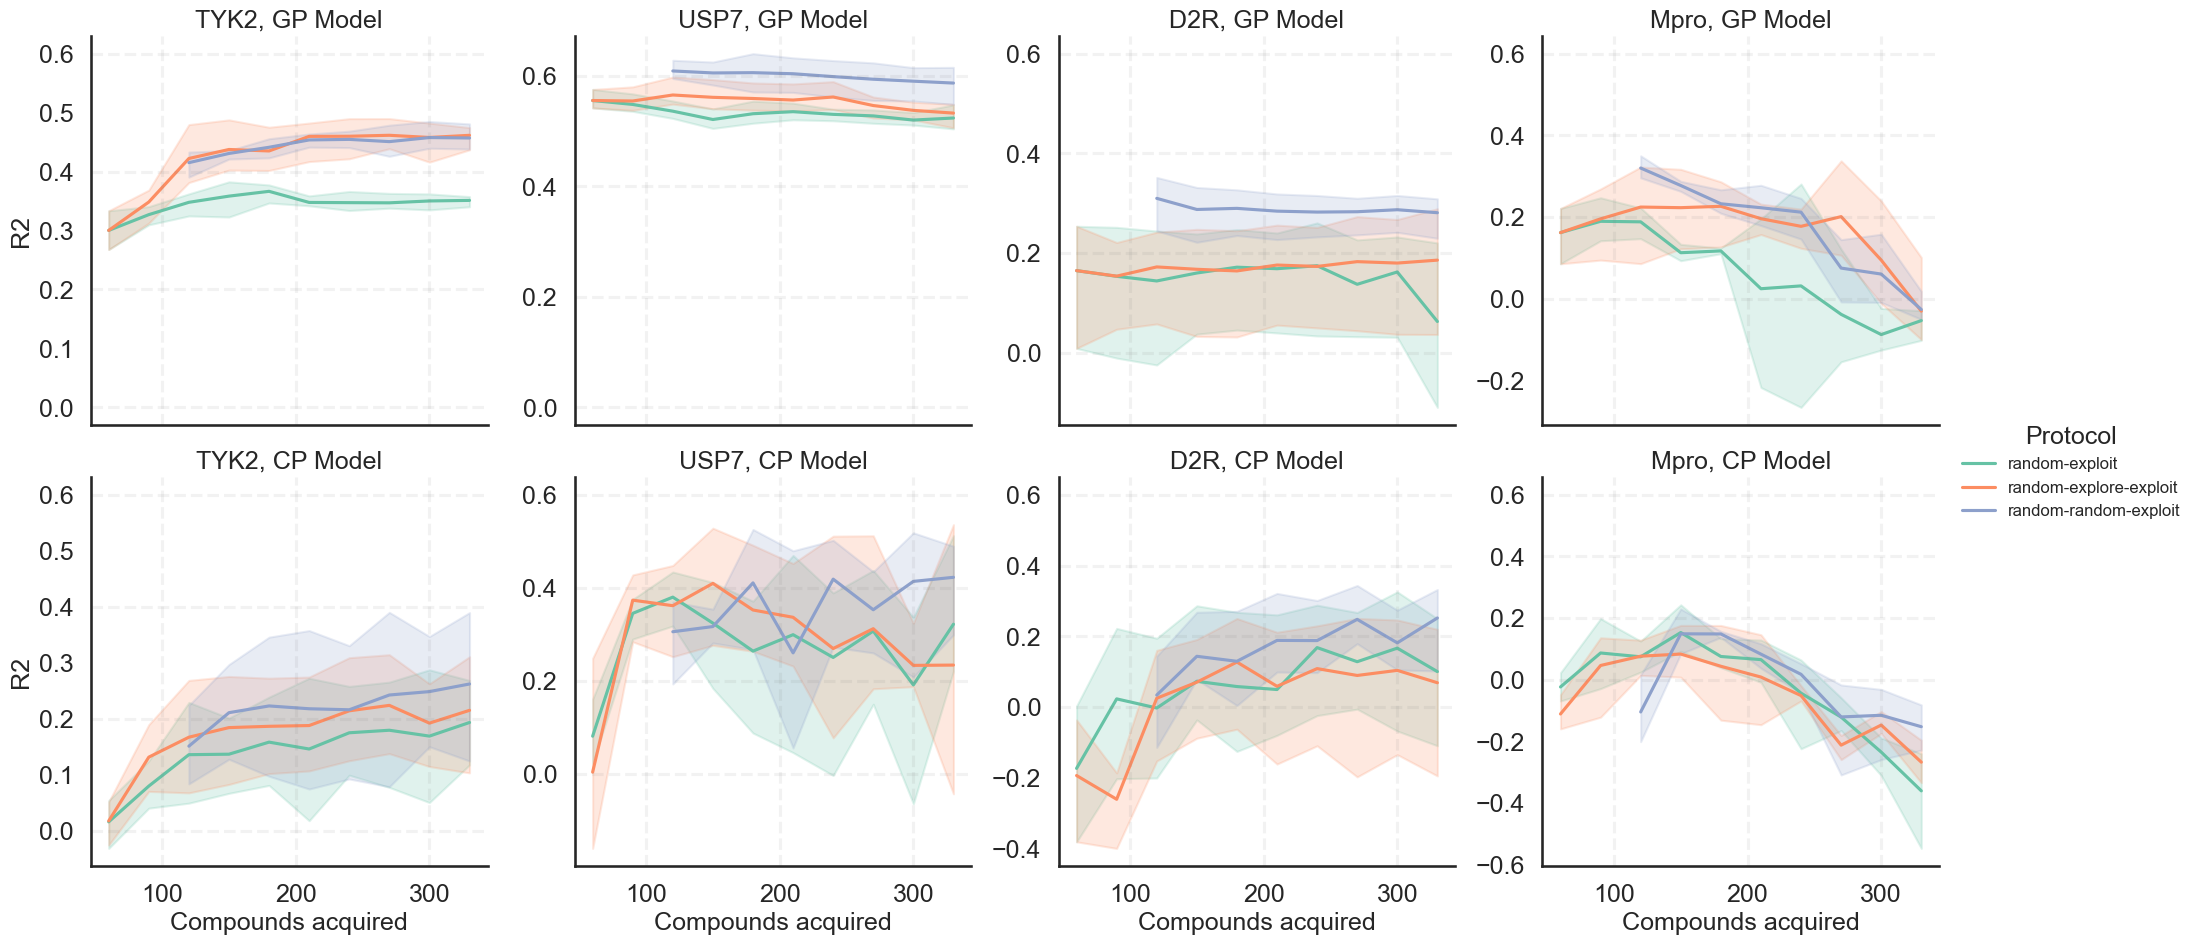

In [50]:
make_plot_metrics("R2")

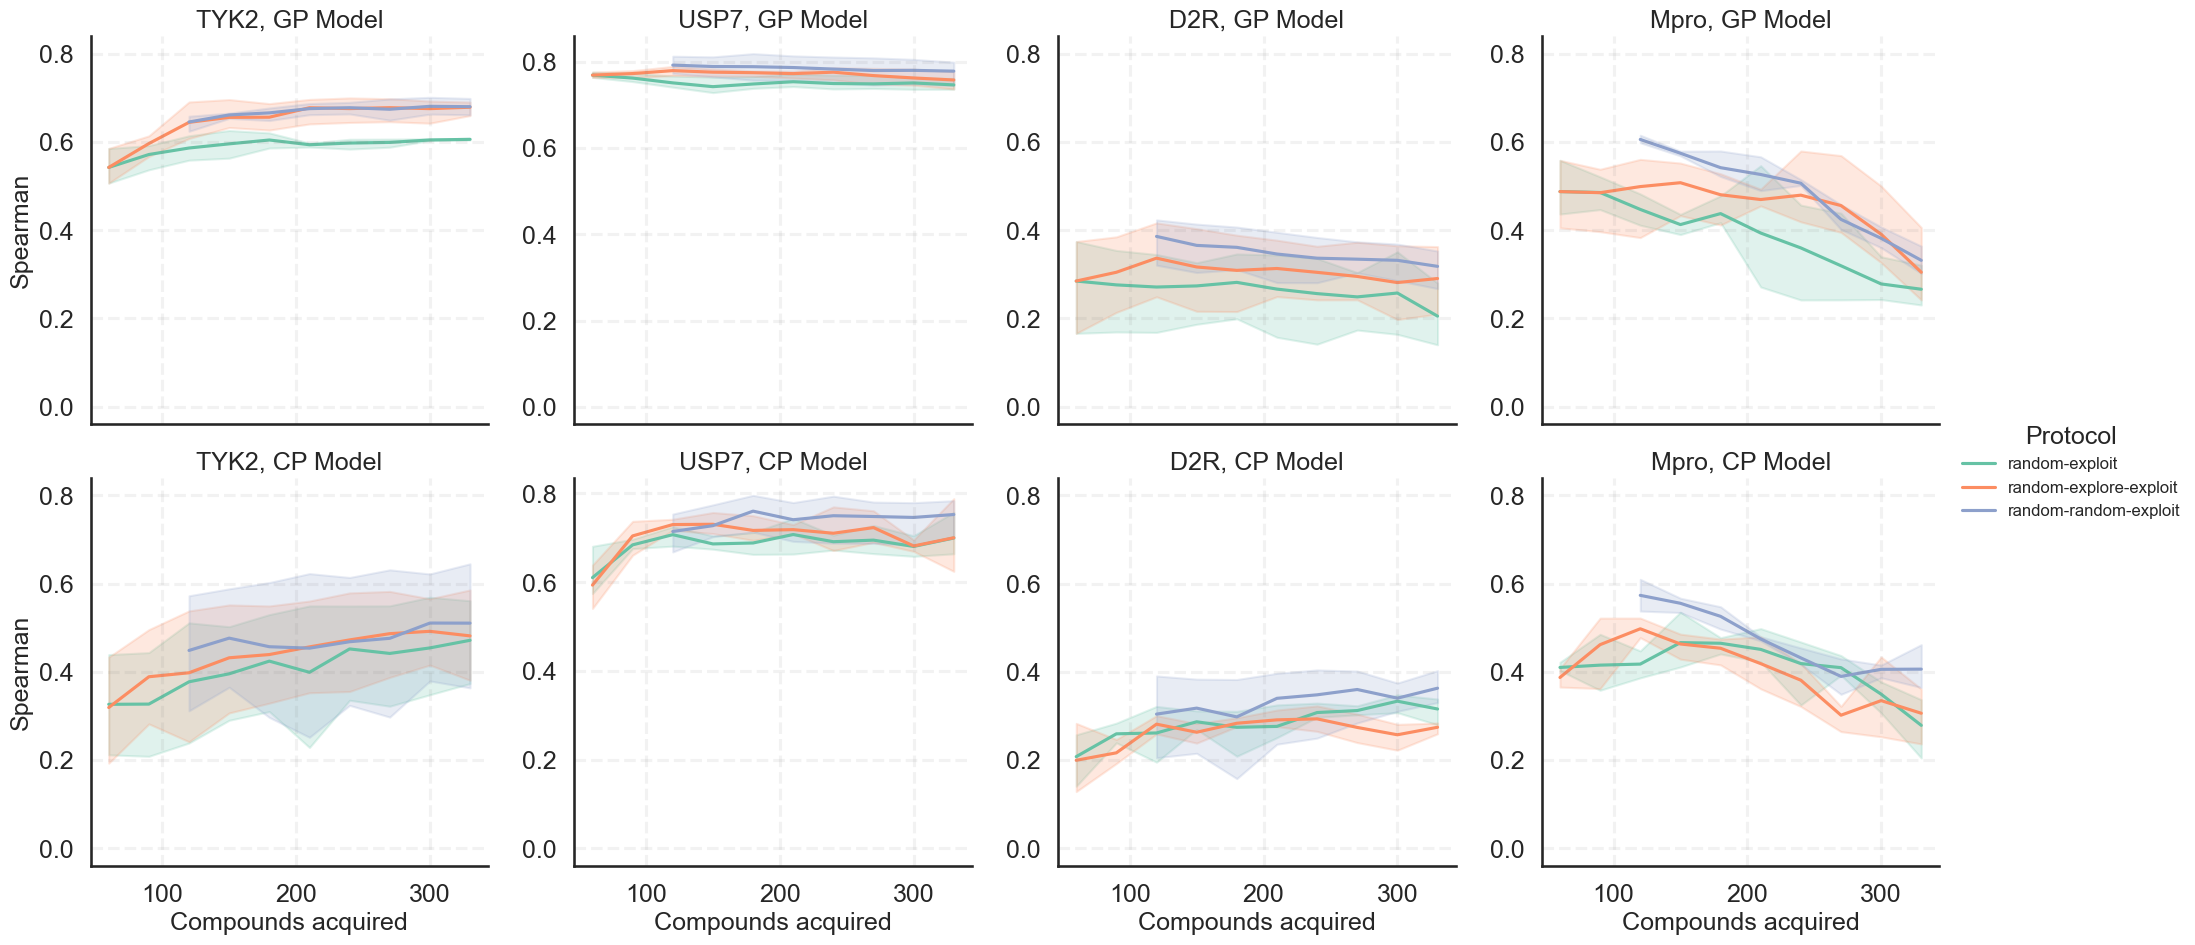

In [48]:
make_plot_metrics("Spearman")

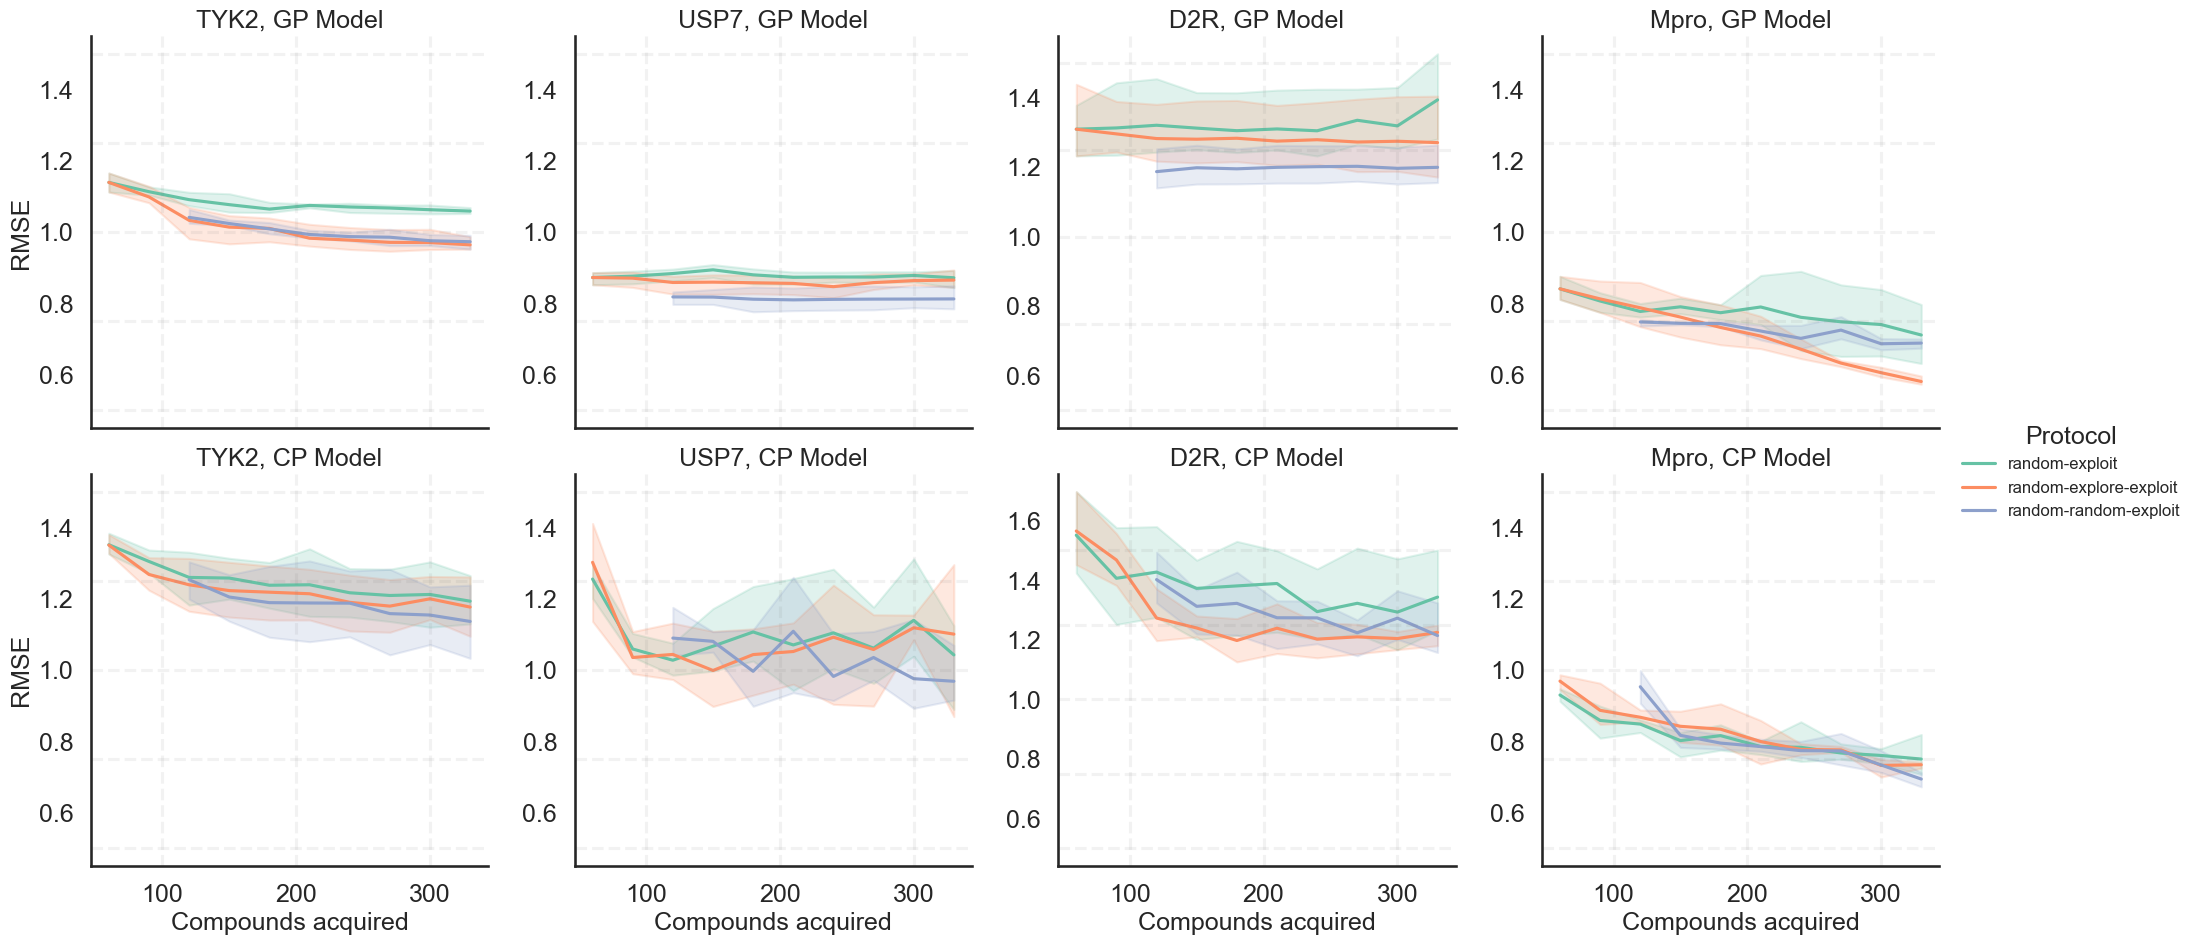

In [33]:
make_plot_metrics("RMSE")

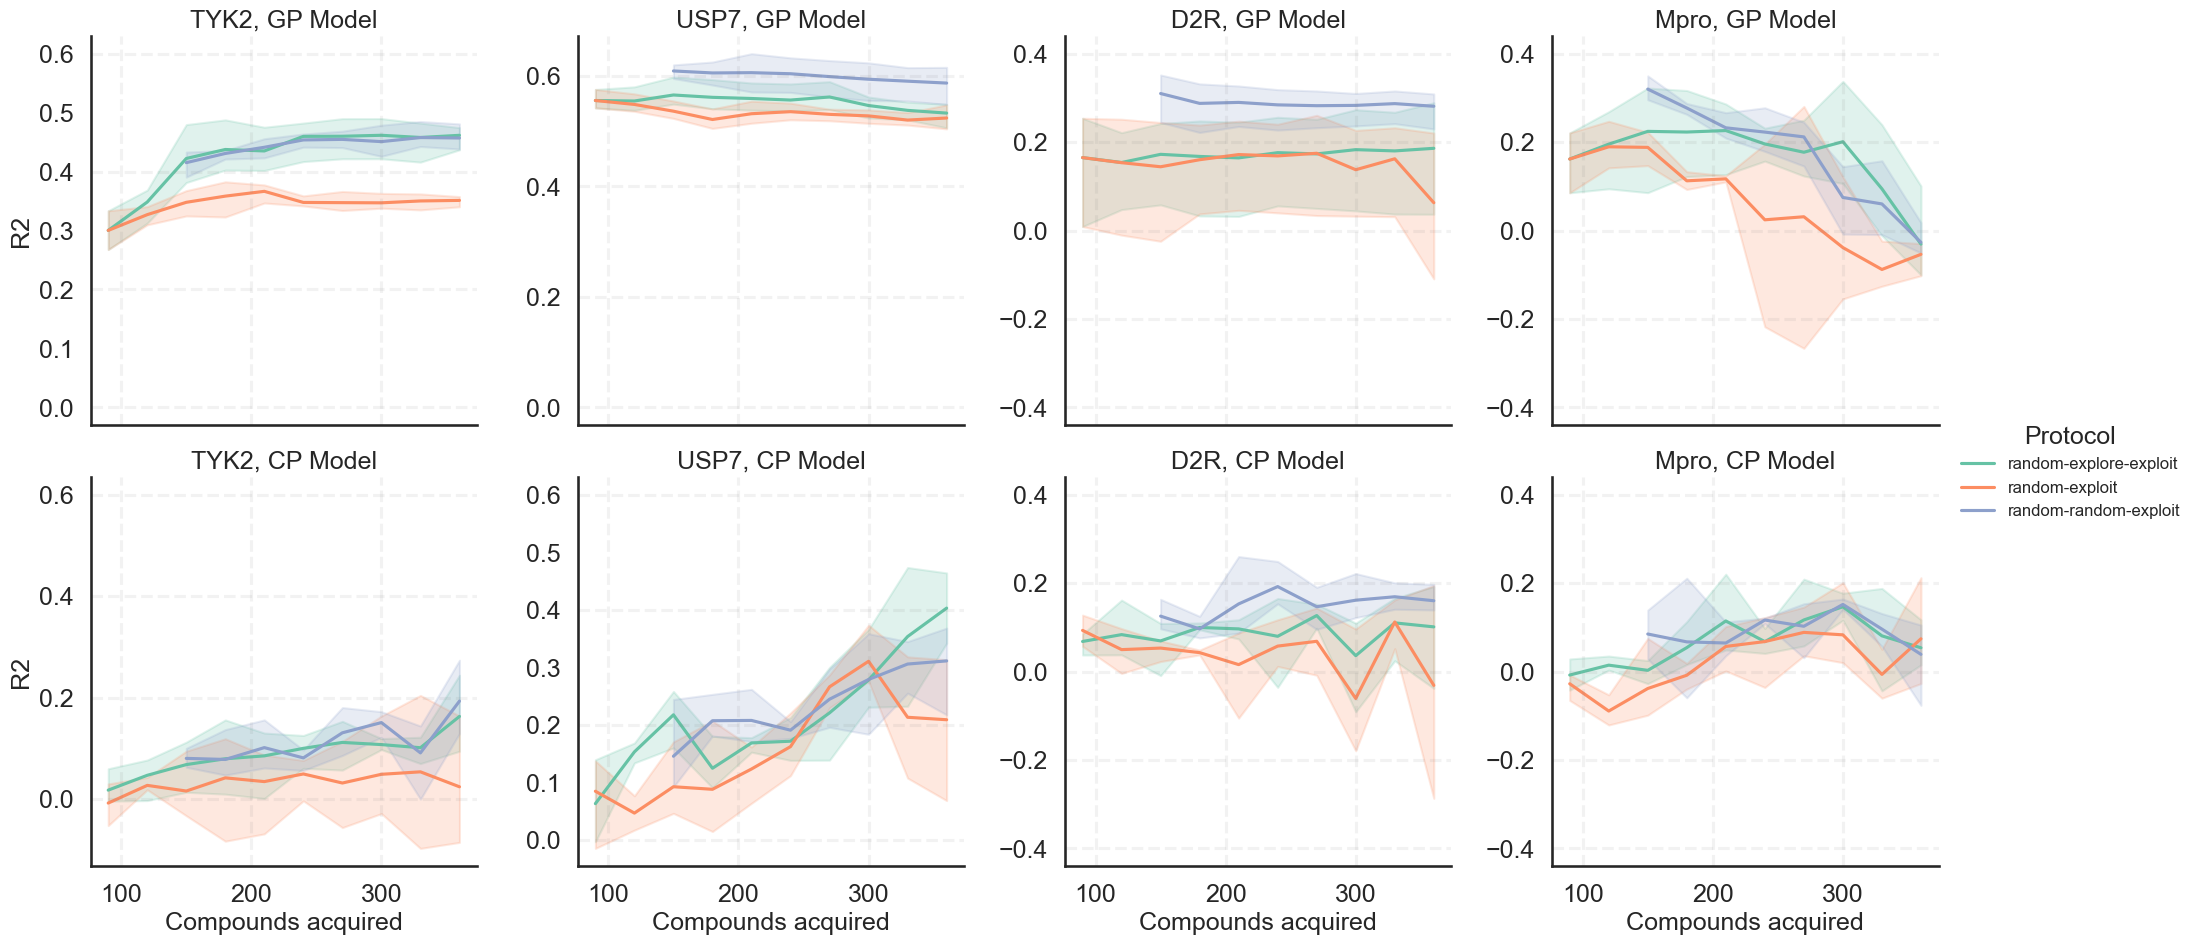

In [ ]:
make_plot_metrics("R2")

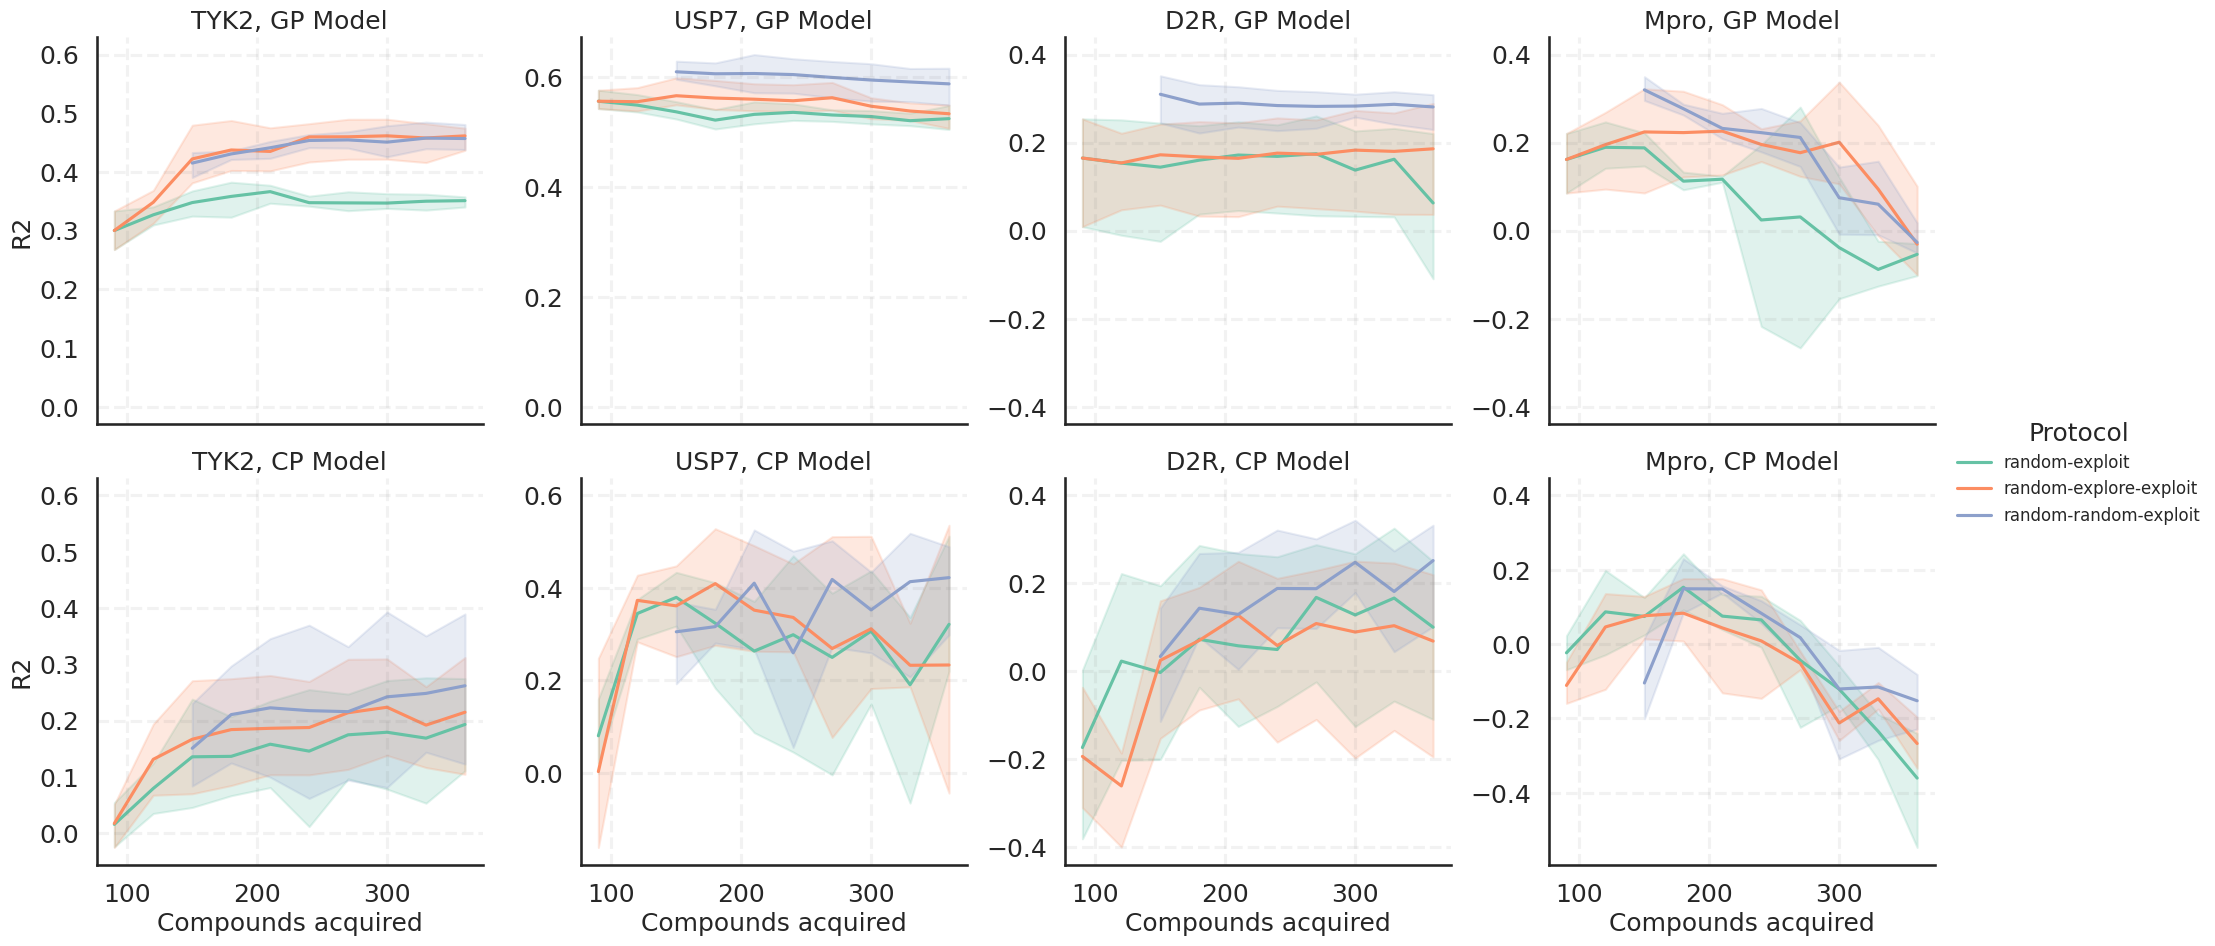

In [ ]:
make_plot_metrics("R2")

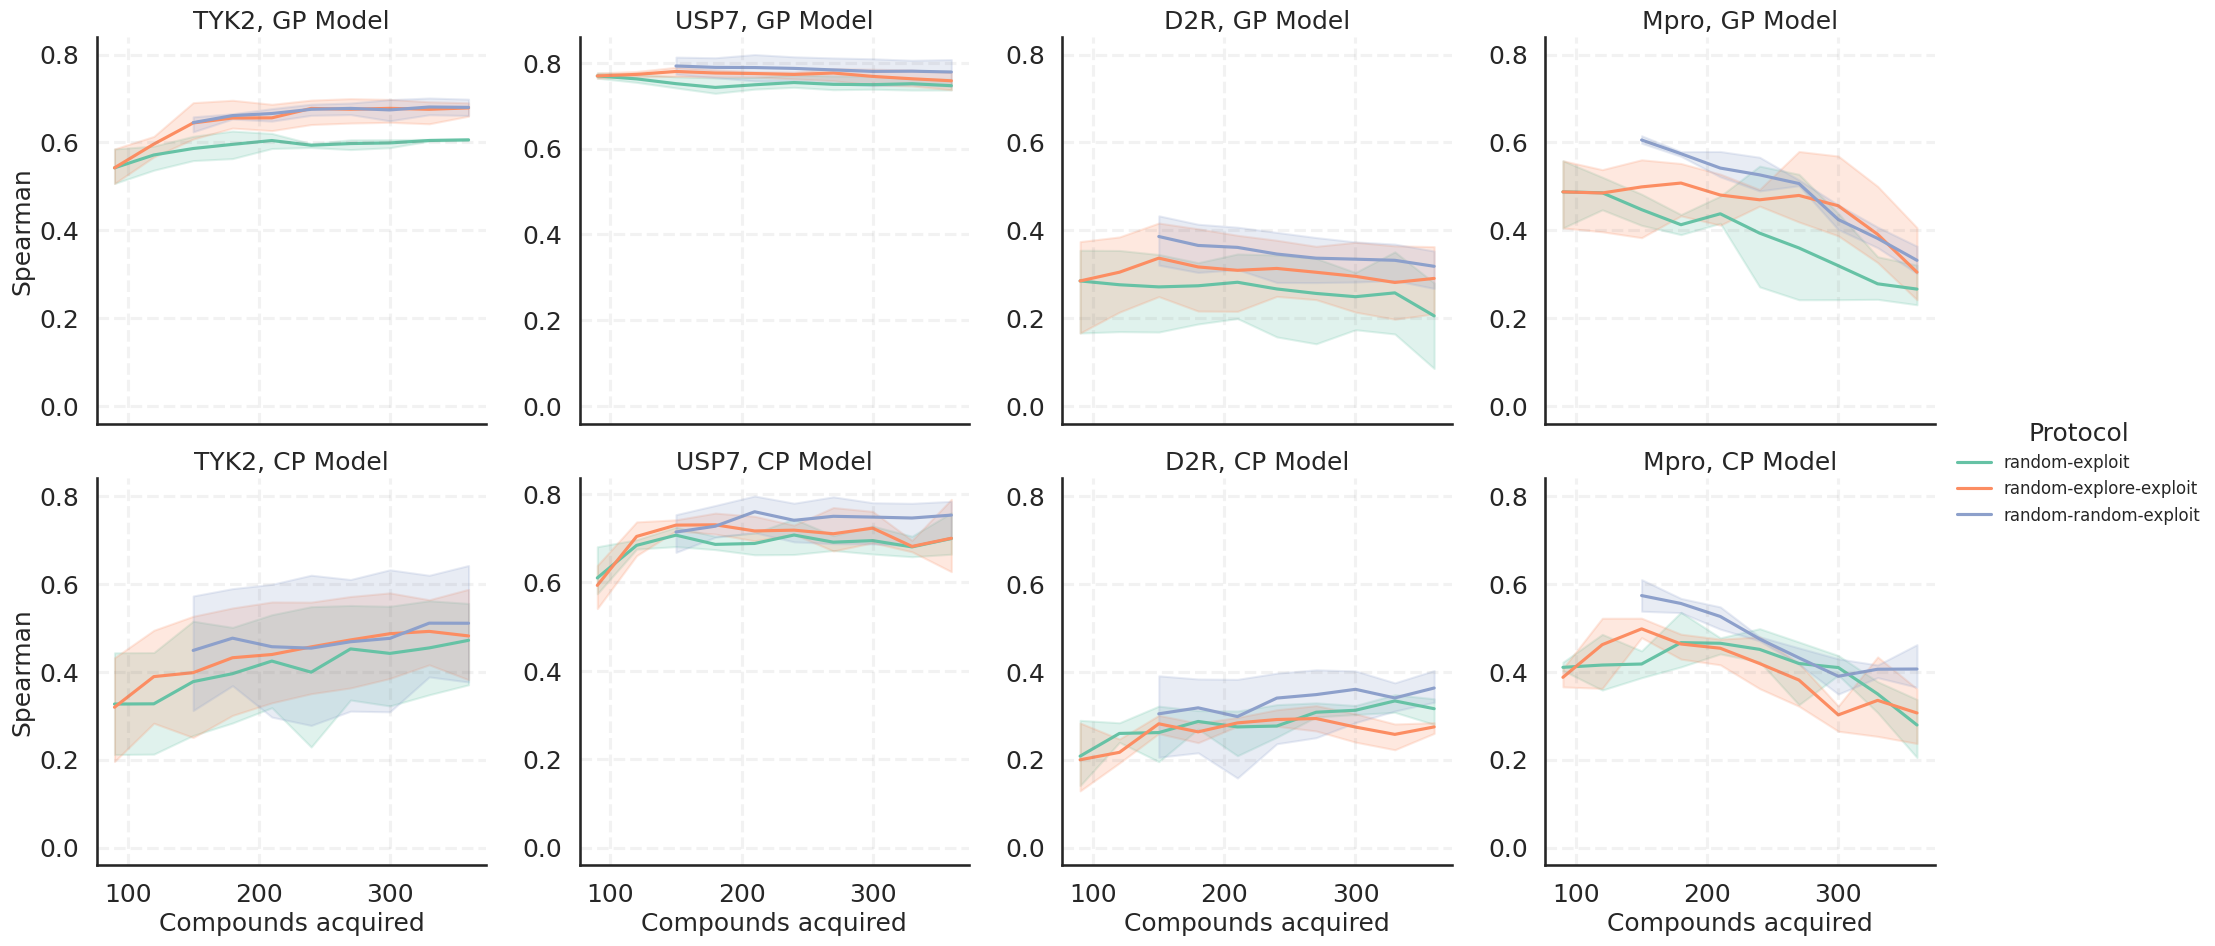

In [ ]:
make_plot_metrics("Spearman")

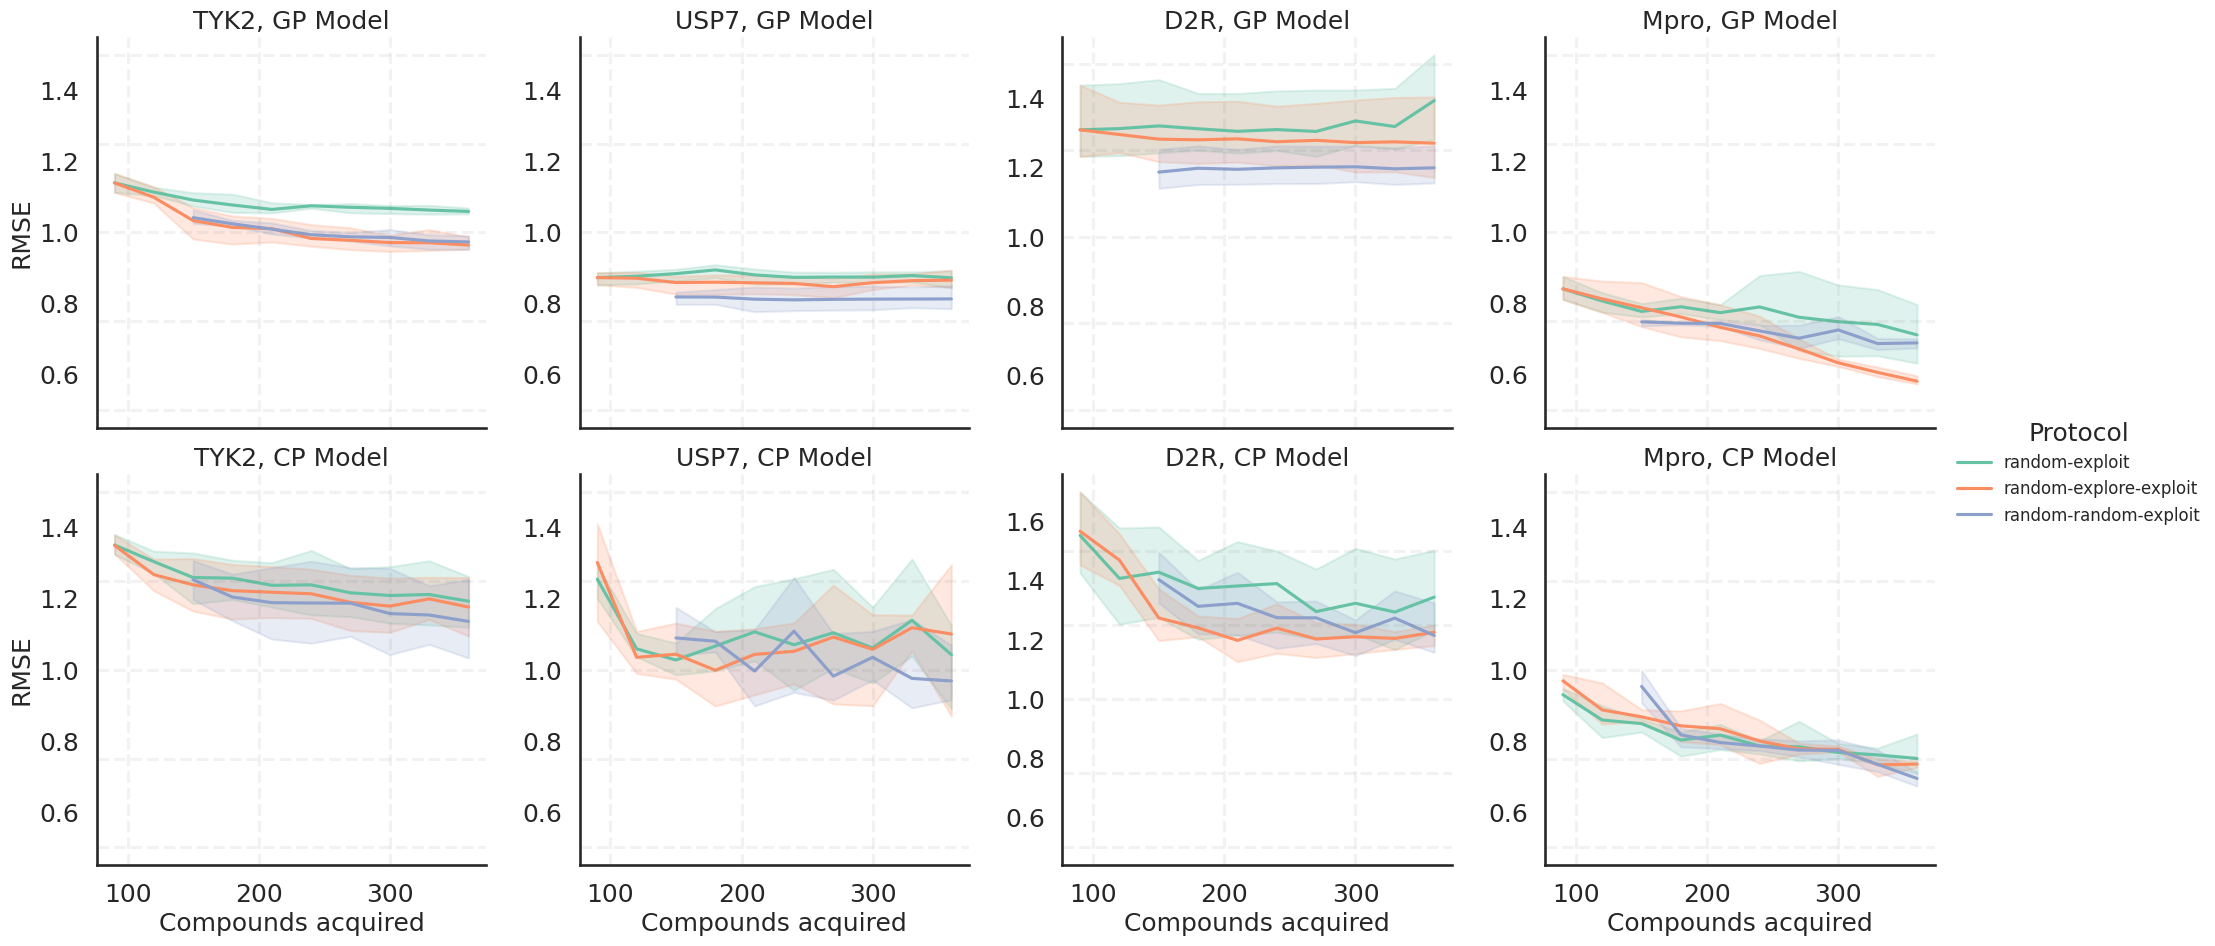

In [ ]:
make_plot_metrics("RMSE")

### Train metrics

In [18]:
metrics_for_plot.rename(columns={"Compounds acquired": "Compounds in Training Set"}, inplace=True)

In [21]:
import seaborn as sns

def make_plot_metrics_train(y: str):
    # Set the style to white background without gridlines
    sns.set_style("white")
    sns.set_context("talk", rc=font_sizes)
    # Set the context for font scaling
#     sns.set_context(font_scale=2.5)
    
    # Define the Set3 color palette
    palette_set3 = sns.color_palette("Set2", n_colors=len(metrics_for_plot['Protocol'].unique()))
    
    # Filter the data to only include the "pool" set
    metrics_for_pool = metrics_for_plot[metrics_for_plot['set'] == 'train']
    
    g = sns.relplot(data=metrics_for_pool, x="Compounds in Training Set", y=y, col="Dataset", 
                    row="Model", hue="Protocol", kind="line", 
                    facet_kws={"sharey": False}, col_order=DATASET_ORDER, hue_order=PROTOCOL_ORDER,
                    row_order=MODEL_ORDER,
                    palette=palette_set3)
    
    g.set_titles(template='{col_name}, {row_name} Model')
    # Add guiding lines
    for i, ax in enumerate(g.axes.flat):
#         for y in [0.4, 0.6,0.8,1]:
#                 ax.axhline(y, color='gray', linestyle='dashed', alpha=0.1)
#For R2
        if i in [9]:  # Indices for 'Mpro'
            for z in [-0.4,-0.2,0,0.2,0.4,]:
                ax.axhline(z, color='gray', linestyle='dashed', alpha=0.1)
# #For RMSE
        # if i in [0,1,2,3,4,5,6,7]:  # Indices for 'Mpro'
        #     for z in [0.2,0.4,0.6,0.8,1,1.2]:
        #         ax.axhline(z, color='gray', linestyle='dashed', alpha=0.1)
        else:
            for z in [0.4, 0.6,0.8,1]:
                ax.axhline(z, color='gray', linestyle='dashed', alpha=0.1)
        
        # Add vertical lines and ticks at 100, 200, and 300 compounds
        for x in [100, 200, 300]:
            ax.axvline(x, color='gray', linestyle='dashed', alpha=0.1)
#             ax.set_xticks(list(ax.get_xticks()) + [x])

    plt.subplots_adjust(top=0.92)
    
    # Remove the spines (borders) for a cleaner look
    sns.despine()
    plt.savefig(f"plots/{y}_all_protocols_train.png", dpi=300, bbox_inches='tight')

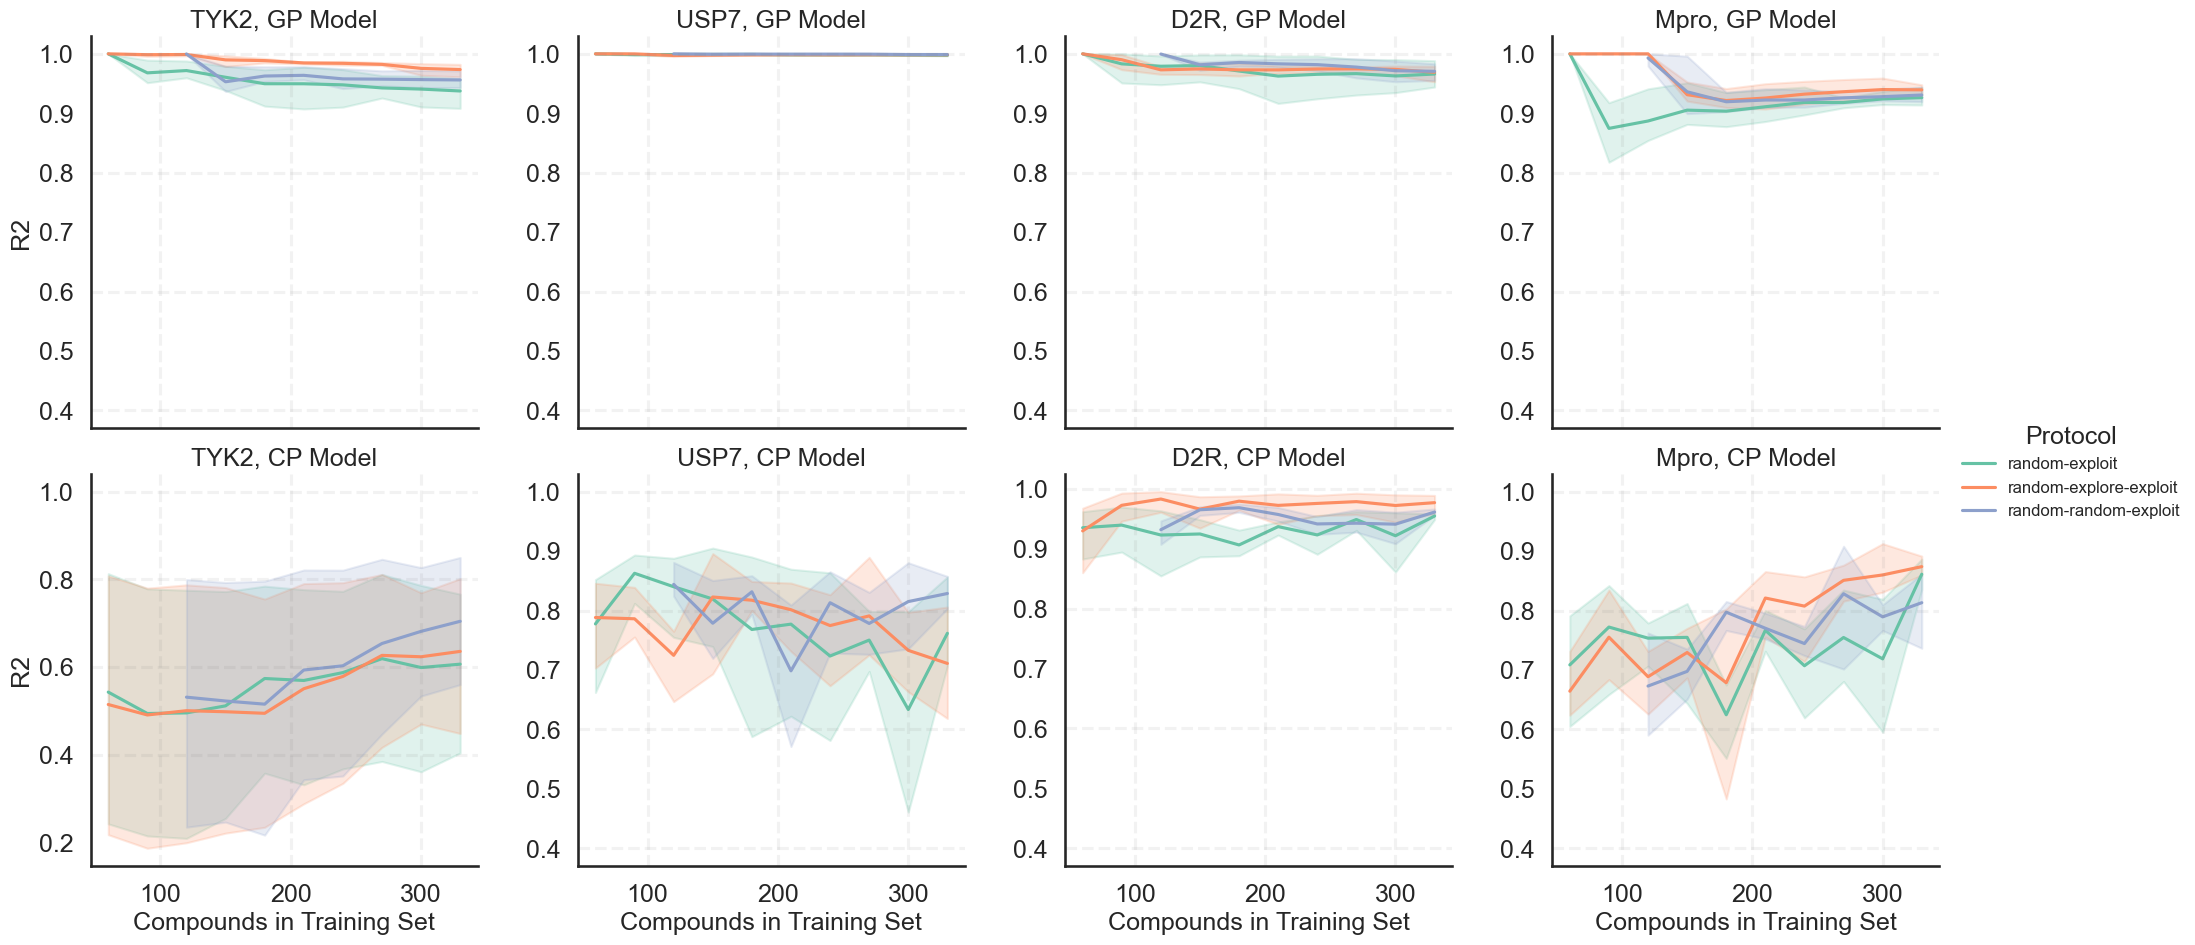

In [22]:
make_plot_metrics_train("R2")

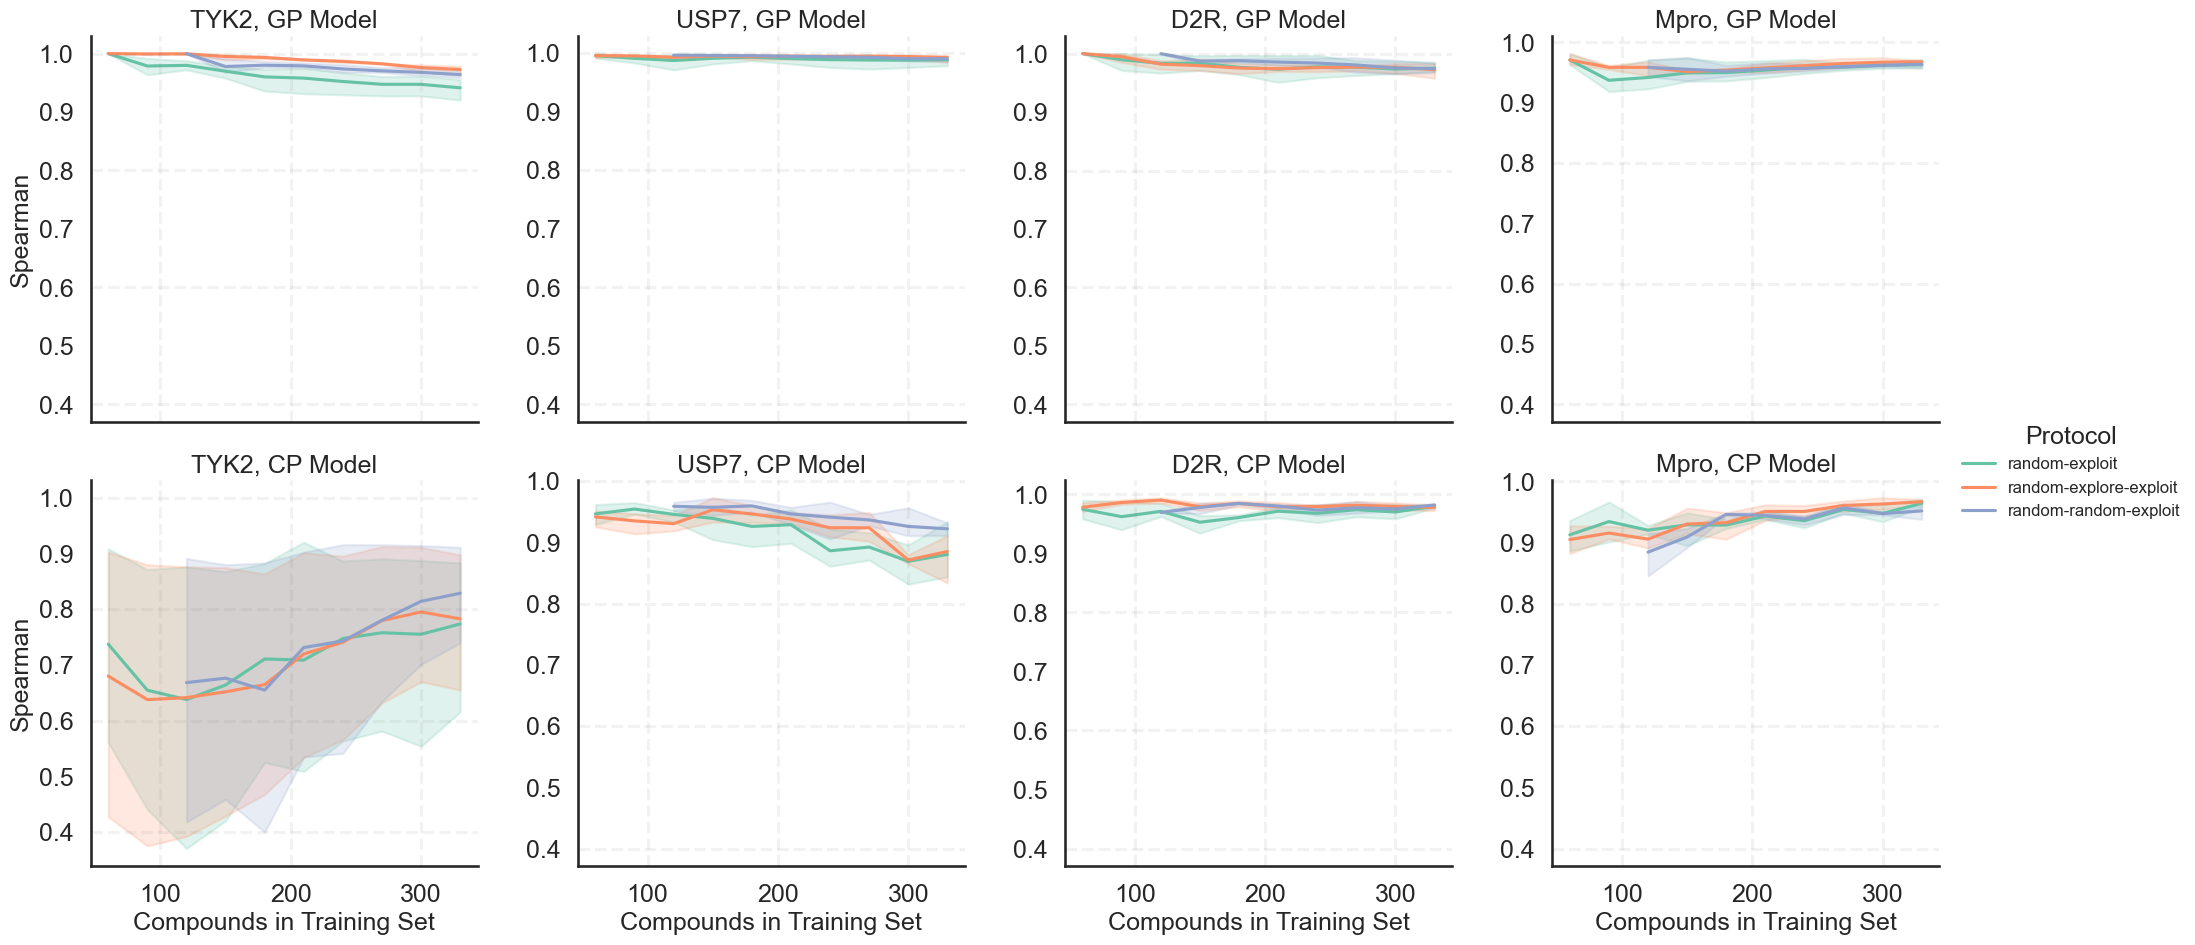

In [23]:
make_plot_metrics_train("Spearman")

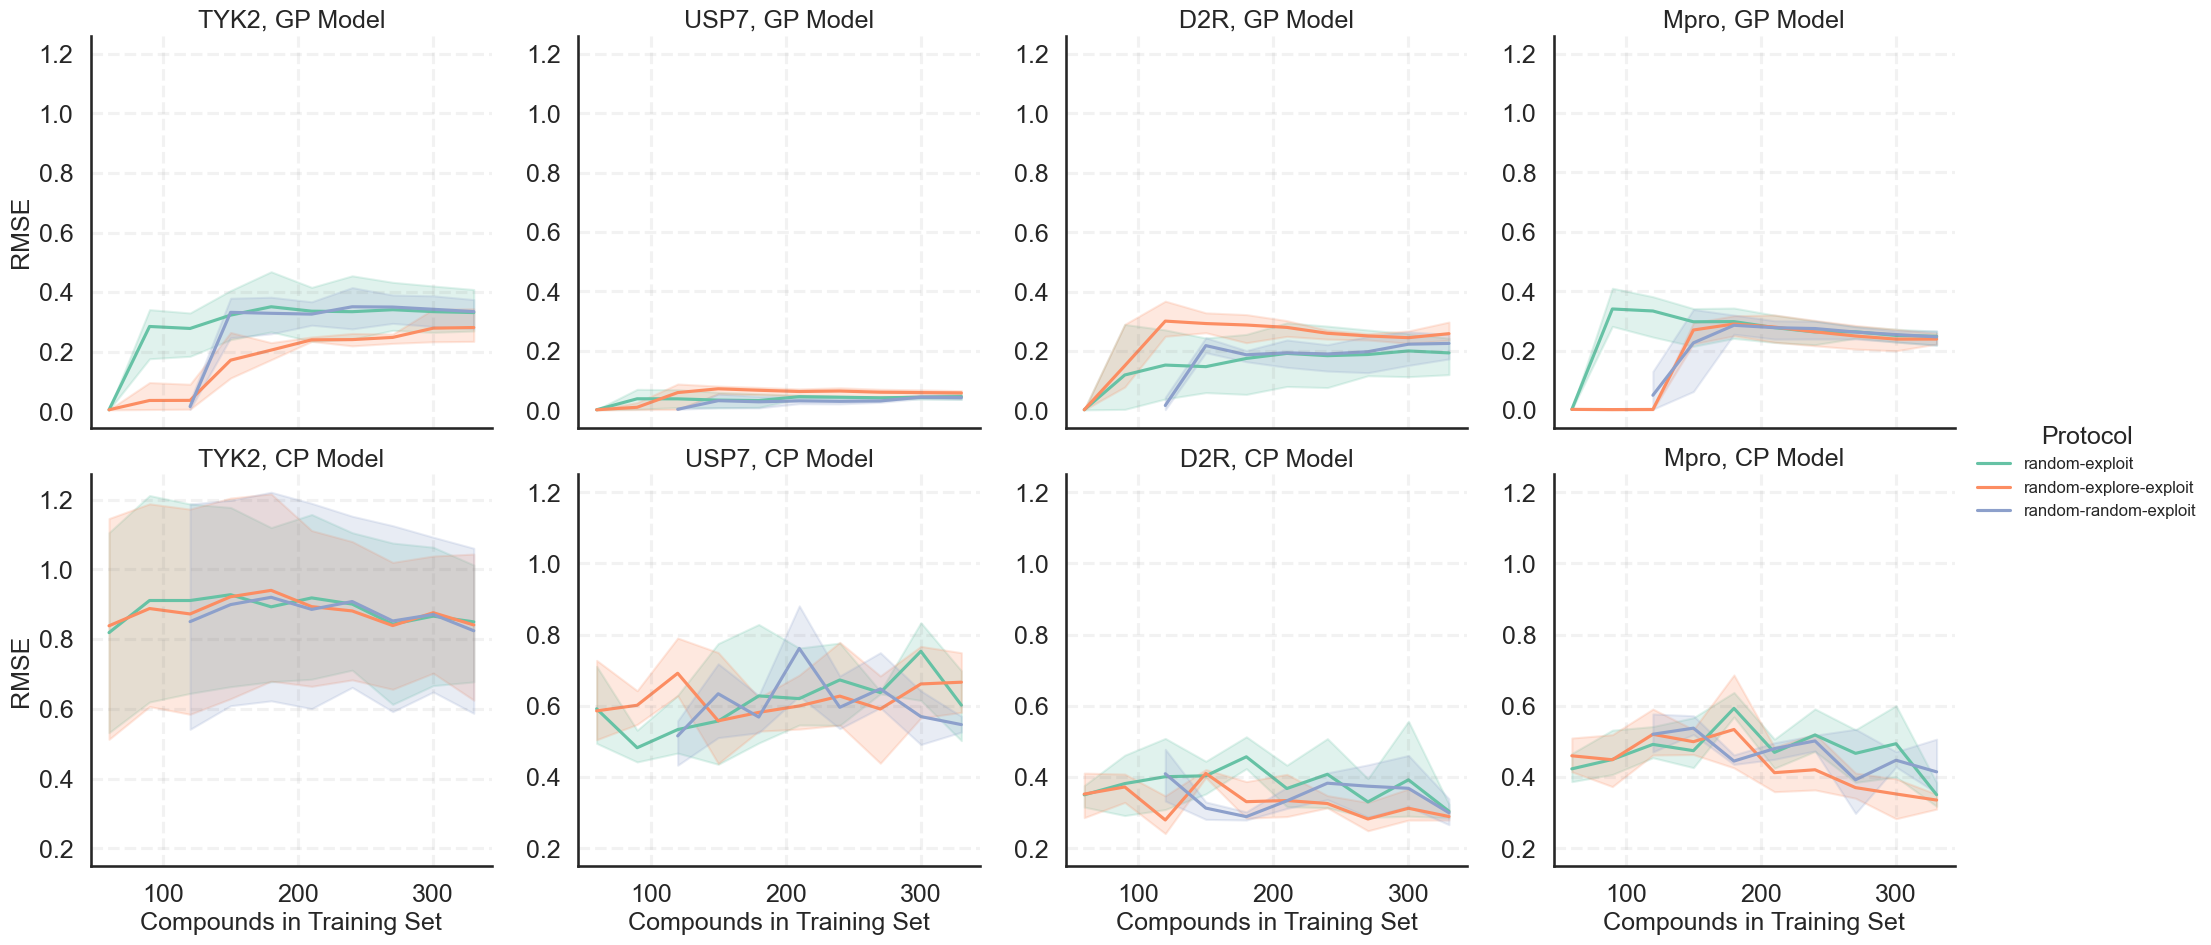

In [20]:
make_plot_metrics_train("RMSE")

In [ ]:
base_path = "data/3_results/"

# Load cp_results and filter out rows with 'random-explore' protocol
cp_results = pd.read_pickle(f"{base_path}combined_results_all_no_null.pkl")
cp_results1 = pd.read_pickle(f"{base_path}combined_results_all_null.pkl")
cp_results = cp_results[cp_results['Protocol'] != 'random-explore']
cp_results1 = cp_results1[cp_results1['Protocol'] != 'random-explore']
cp_results = cp_results[cp_results['Model'] != 'GP']
cp_results1 = cp_results1[cp_results1['Model'] != 'GP']
# Load combined_results and filter out rows with 'CP' model
combined_results = pd.read_pickle(f"{base_path}combined_results_all.pkl")
combined_results = combined_results[combined_results['Model'] != 'CP']

# Concatenate the two DataFrames
results = pd.concat([cp_results,cp_results1, combined_results], ignore_index=True)


In [ ]:
cp_results['Protocol'].unique()

array(['random-explore-exploit'], dtype=object)

In [ ]:
cp_results1['Protocol'].unique()

array(['random-exploit', 'random-random-exploit'], dtype=object)

In [ ]:
results.columns

MultiIndex([(           'SMILES', ''),
            (         'affinity', ''),
            (           'top_2p', ''),
            (           'top_5p', ''),
            (             'pred',  0),
            (             'pred',  1),
            (             'pred',  2),
            (             'pred',  3),
            (             'pred',  4),
            (             'pred',  5),
            (             'pred',  6),
            (             'pred',  7),
            (             'pred',  8),
            (             'pred',  9),
            (             'pred', 10),
            (              'std',  0),
            (              'std',  1),
            (              'std',  2),
            (              'std',  3),
            (              'std',  4),
            (              'std',  5),
            (              'std',  6),
            (              'std',  7),
            (              'std',  8),
            (              'std',  9),
            (            

In [ ]:
from typing import Any, Dict, List

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


def _check_for_errors(
    df: pd.DataFrame, heatmap_col: str, set_col: str, set_as_heatmap: str
) -> None:
    """Helper function to check if provided arguments are compatible

    Args:
        df (pd.DataFrame): Data to plot
        heatmap_col (str): Name of column to be shown on a heatmap
        set_col (str): Name of column which splits data into sets to be plotted with different markers
        set_as_heatmap (str): Name of set (one in set_col.unique) to be plotted on a heatmap
    """
    if heatmap_col and (heatmap_col not in df.columns):
        raise Exception(f"Data frame has no column named {heatmap_col}!")

    if set_col and (set_col not in df.columns):
        raise Exception(f"Data frame has no column named {set_col}!")

    if set_as_heatmap and not (heatmap_col and set_col):
        raise Exception("Must provide both heatmap_col and set_col with set_as_heatmap")


def _subset_dict(dict_to_subset: Dict[str, Any], sets: List[str]) -> Dict[str, Any]:
    """Subset dict to only include keys specified as sets

    Args:
        dict (Dict[str, Any]): Dict as provided to input
        sets (List[str]): List of sets to include

    Returns:
        Dict[str, Any]: dict with filtered keys
    """
    if dict_to_subset:
        return {k: v for (k, v) in dict_to_subset.items() if k in sets}
    else:
        return {}


def plot_chemical_space(
    df: pd.DataFrame,
    feature_map: np.ndarray,
    heatmap_col: str = None,
    set_col: str = None,
    set_as_heatmap: str = None,
    indices: List = None,
    size: int = 7,
    markersize: int = 9,
    set_markersize: int = 9,
    cmap: str = "copper_r",
    ax: Any = None,
    set_colors: Dict[str, Any] = {},
    set_markers: Dict[str, str] = {},
    set_order: List[str] = [],
    zorder: Dict[str, int] = {},
    legend: bool = True,
    labels: Dict[str, Any] = {},
    xlabel: str = '',
    ylabel: str = '',
) -> Any:
    """Generic function for making TSNE/UMAP plots of all kinds

    Args:
        df (pd.DataFrame): Dataframe containing compounds as rows
        feature_map (np.ndarray): Output from TSNE or UMAP
        heatmap_col (str, optional): Column to be shown on a heatmap. Defaults to None.
        set_col (str, optional): Column splitting data to sets, which are plotted with different markers.
           Defaults to None.
        set_as_heatmap (str, optional): Set (from data.set_col.unique) to be shown on a heatmap. Defaults to None.
        indices (List, optional): Subset of data to plot (if None, plot everything). Defaults to None.
        size (int, optional): Figure size. Defaults to 10.
        markersize (int, optional): Marker size (heatmap). Defaults to 10.
        set_markersize (int, optional): Markersize (monochrome sets). Defaults to 10.
        cmap (str, optional): Color map for heatmap. Defaults to "Reds".
        ax (Any, optional): Axis object to plot this in, if part of a bigger subplots. Defaults to None.
        set_colors (Dict[str, Any], optional): Mapping of sets to colors for set markers. Defaults to None.
        set_markers (Dict[str, str], optional): Mapping of sets to marker types for set markers. Defaults to None.
        set_order (List[str], optional): Order of sets. Defaults to None.
        zorder (Dict[str, int], optional): Order of the sets. Defaults to {}.

    Returns:
        Any: _description_
    """

    if indices is None:
        indices = list(range(df.shape[0]))

    df2 = df.reset_index().iloc[indices]

    _check_for_errors(df, heatmap_col, set_col, set_as_heatmap)

    # remove entries from dicts corresponding to sets which are not included in df
    if set_col:
        sets = df[set_col].unique()

        if set_order:
            set_order = [s for s in set_order if s in sets]

        set_colors = _subset_dict(set_colors, sets)
        set_markers = _subset_dict(set_markers, sets)
        zorder = _subset_dict(zorder, sets)

        if set_as_heatmap not in sets:
            set_as_heatmap = None
            heatmap_col = None

    if heatmap_col and set_col and set_as_heatmap:
        heatmap_index = df2.loc[df2[set_col] == set_as_heatmap].index
        set_df = df2.loc[df2[set_col] != set_as_heatmap]
    elif heatmap_col:
        heatmap_index = indices
    elif set_col:
        set_df = df2.copy()

    if not (heatmap_col and set_col):
        set_markersize = markersize

    sns.set()
    sns.set_style('white')  # Set background style to white
    plt.rcParams["axes.grid"] = False
    

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(size, size))
        return_fig = True
    else:
        return_fig = False

    if heatmap_col:
        plt.subplots_adjust(right=0.9)

        norm = plt.Normalize(df2[heatmap_col].min(), df2[heatmap_col].max())
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        ax.scatter(
            *feature_map.T[:, heatmap_index],
            c=df.iloc[heatmap_index][heatmap_col].tolist(),
            s=markersize,
            linewidth=0,
            cmap=cmap,
            norm=norm,
            zorder=zorder.get(set_as_heatmap, 0),
        )
        plt.colorbar(sm, ax=ax)

    if set_col:
        if not set_order:
            cols = sorted(sets)
        else:
            cols = set_order

        cm = plt.cm.get_cmap("copper", len(cols) + 1)  # assume we have <= 10 sets
        set_colors_default = {
            k: cm(len(cols) - v) for k, v in zip(cols, list(range(len(cols))))
        }

        for k, v in set_colors_default.items():
            set_colors[k] = set_colors.get(k, v)

        if not set_markers:
            set_markers = {c: "o" for c in cols}

        for name, col in set_colors.items():
            idx = set_df[set_df[set_col] == name].index
            marker = set_markers[name]
            ax.scatter(
                *feature_map.T[:, idx],
                color=col,
                s=set_markersize,
                marker=marker,
                linewidth=0 if marker == "o" else 1,
                label=labels.get(name, name),
                zorder=zorder.get(name, 0),
            )
        if legend:
            ax.legend(title=set_col,loc="upper right",bbox_to_anchor=(1.15,1))
# bbox_to_anchor=(1.05, 0.75)
    if not heatmap_col and not set_col:
        ax.scatter(*feature_map.T[:, indices], color="b", s=markersize, linewidth=0)

    ax.set_box_aspect(1)
    ax.set_yticks([])
    ax.set_xticks([])
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

    if not return_fig:
        return ax

    return fig, ax

In [49]:
import pickle

def plot_cpds_found_on_fmap(results: pd.DataFrame, dataset: str, set = "top_2p", model=None, protocol_name=None, noise_level=None, ax=None, xlabel=None, ylabel=None, legend=False, cycle=None):

    df = results[results.Dataset == dataset].reset_index(drop=True)

    if model is not None:
        df = df[df.Model == model].reset_index(drop=True)

    if protocol_name is not None:
        df = df[df.Protocol == protocol_name].reset_index(drop=True)

    if noise_level is not None:
        df = df[df.noise_level == noise_level].reset_index(drop=True)

    df = df.dropna(axis="columns")

    df["selected"] = 0
    if cycle is None:
        n_cycles = len(df.set.columns)-1
    else: 
        n_cycles = cycle
    df.loc[df[("set", n_cycles)] == "train", "selected"] = 1

    df = df[["SMILES","top_2p", "selected"]]
    df = df.groupby(["SMILES"]).mean().reset_index()


    
    df = df.sort_values(by="SMILES").reset_index(drop=True)
    df["selected"] = df.selected.apply(lambda x: round(x, 2))

    df.loc[df.top_2p == False, "selected"]  = -1

    with open(f"data/feature_maps/{dataset}.pkl", "rb") as fmap_file:
        feature_map = pickle.load(fmap_file)

    levels = len(df.selected.unique()) - 1
    zorder_sel ={k/(levels-1)+1: k for k in range(levels)}
    zorder = {"not in top 2%": 0, **zorder_sel}

    plot_chemical_space(df, feature_map, set_col="selected",  \
                    set_colors={-1: "gray"}, zorder=zorder, cmap="copper_r", markersize=10, ax=ax, labels={-1: "not in top 2%"}, set_markersize=10, xlabel=xlabel, ylabel=ylabel, legend=legend)

In [61]:
import matplotlib.pyplot as plt

def plot_all_protocols(dataset: str, cycle=None):
    fig, ax = plt.subplots(3, 2, figsize=(5,8))

    plot_cpds_found_on_fmap(results, dataset, "top_2p", model="GP", protocol_name="random-exploit", ax=ax[0,0], ylabel="random-exploit", cycle=cycle)
    plot_cpds_found_on_fmap(results, dataset, "top_2p", model="GP", protocol_name="random-explore-exploit", ax=ax[1,0], ylabel="random-explore-exploit", cycle=cycle)
    plot_cpds_found_on_fmap(results, dataset, "top_2p", model="GP", protocol_name="random-random-exploit", ax=ax[2,0], ylabel="random-random-exploit", cycle=cycle)
    plot_cpds_found_on_fmap(results, dataset, "top_2p", model="CP", protocol_name="random-exploit", ax=ax[0,1], cycle=cycle)
    plot_cpds_found_on_fmap(results, dataset, "top_2p", model="CP", protocol_name="random-explore-exploit", ax=ax[1,1], legend=False, cycle=cycle)
    plot_cpds_found_on_fmap(results, dataset, "top_2p", model="CP", protocol_name="random-random-exploit", ax=ax[2,1], cycle=cycle)
    
    ax[0,0].set_title("GP")
    ax[0,1].set_title("CP")
    # Create a single legend for the entire figure
    handles, labels = ax[1,1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.3, 0.5))
    fig.tight_layout()
    fig.savefig(f"plots/{dataset}_all_protocols.png", dpi=300, bbox_inches='tight')

In [52]:
import matplotlib.pyplot as plt

def plot_all_datasets(model: str):
    fig, ax = plt.subplots(2, 2, figsize=(7,6))

    plot_cpds_found_on_fmap(results, "TYK2", "top_2p", model=model, ax=ax[0,0])
    plot_cpds_found_on_fmap(results, "USP7", "top_2p", model=model, ax=ax[0,1])
    plot_cpds_found_on_fmap(results, "D2R", "top_2p", model=model, ax=ax[1,0])
    plot_cpds_found_on_fmap(results, "Mpro", "top_2p", model=model, ax=ax[1,1])

    ax[0,0].set_title("TYK2")
    ax[0,1].set_title("USP7")
    ax[1,0].set_title("D2R")
    ax[1,1].set_title("Mpro")
    
    fig.colorbar(plt.cm.ScalarMappable(norm=None, cmap="copper_r"), ax=ax.ravel().tolist())

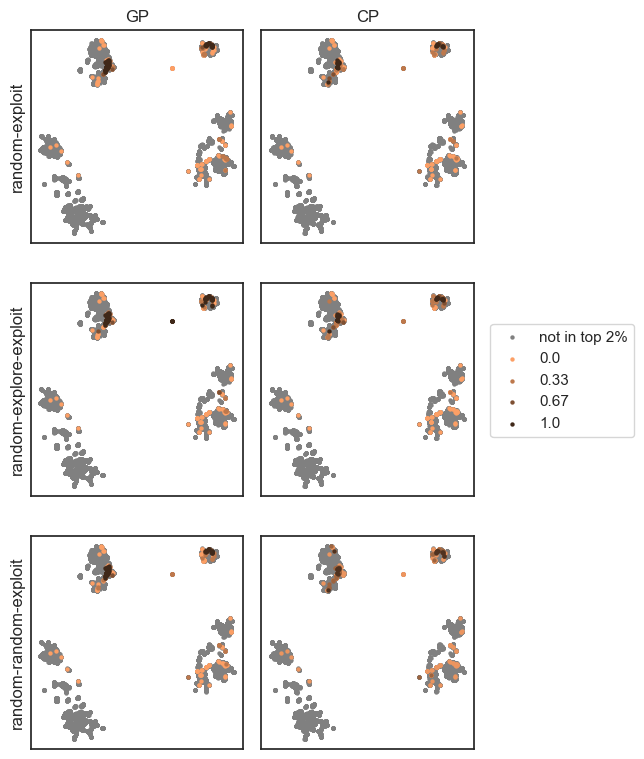

In [63]:
plot_all_protocols("TYK2")

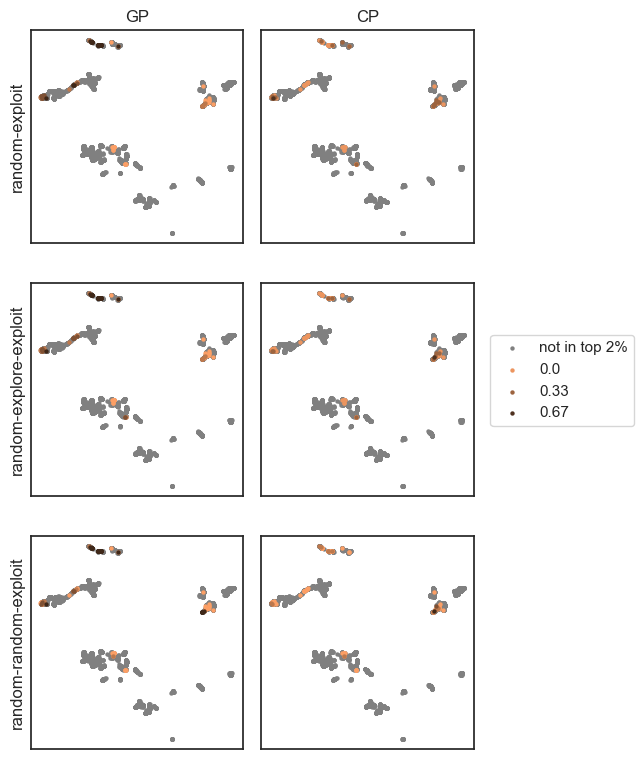

In [64]:
plot_all_protocols("USP7")

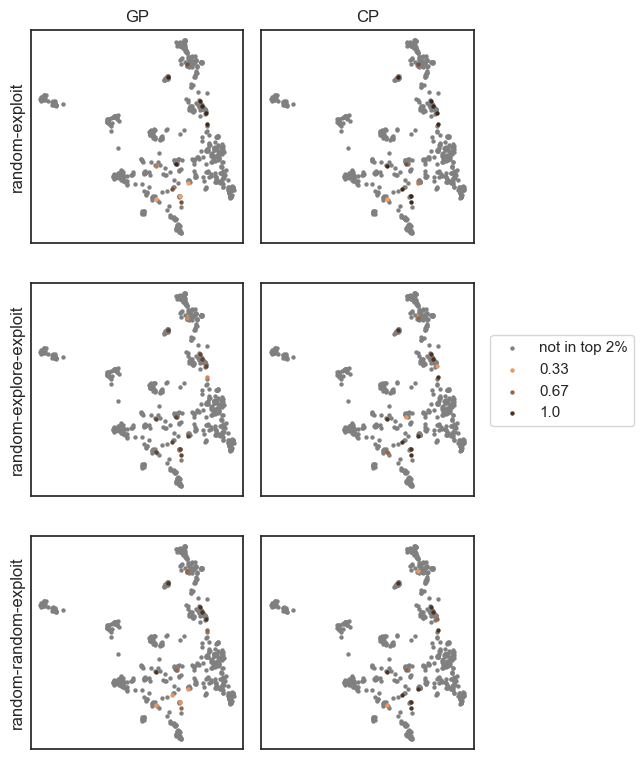

In [65]:
plot_all_protocols("Mpro")

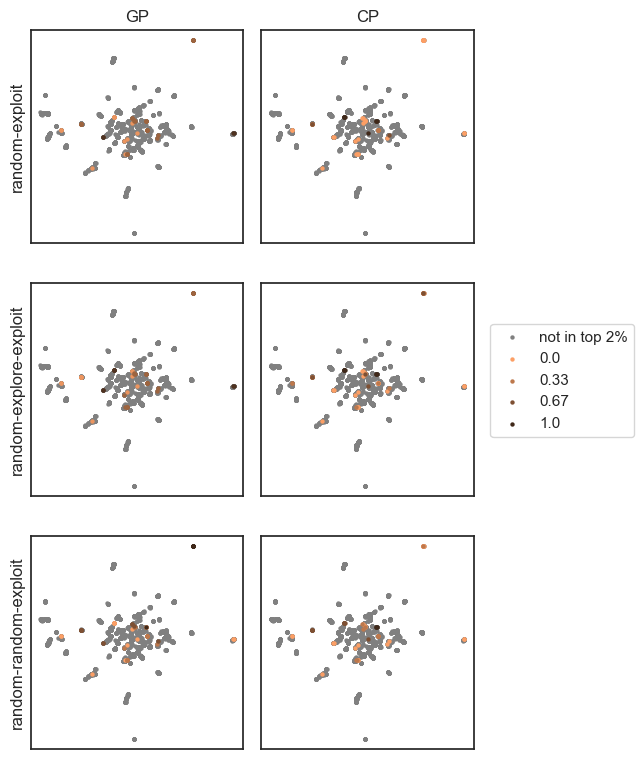

In [66]:
plot_all_protocols("D2R")

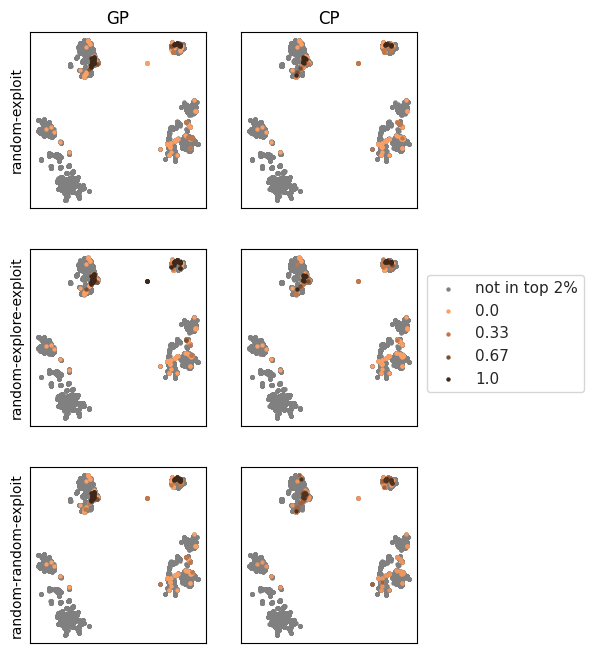

In [10]:
plot_all_protocols("TYK2")

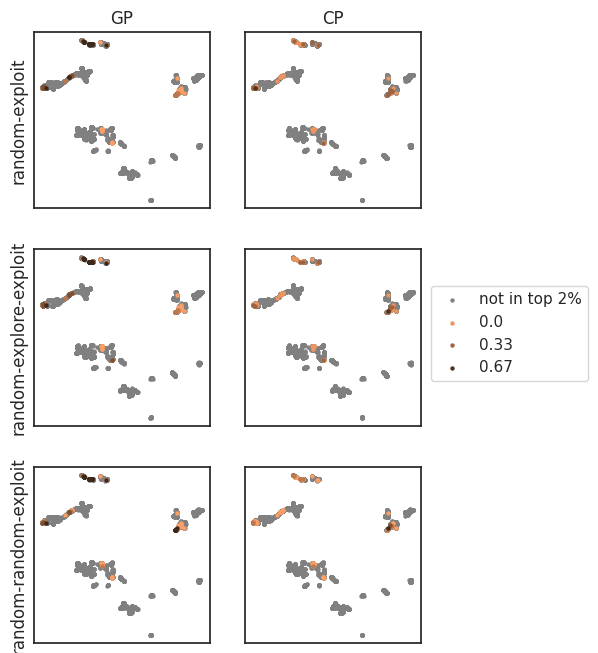

In [11]:
plot_all_protocols("USP7")

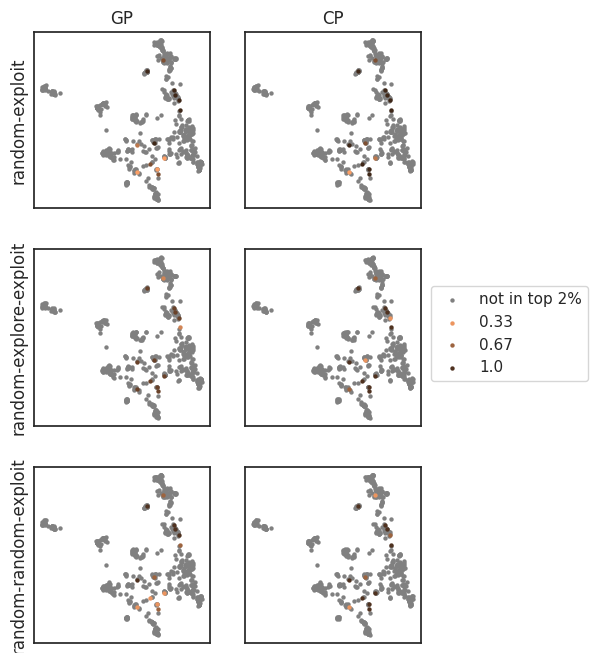

In [12]:
plot_all_protocols("Mpro")

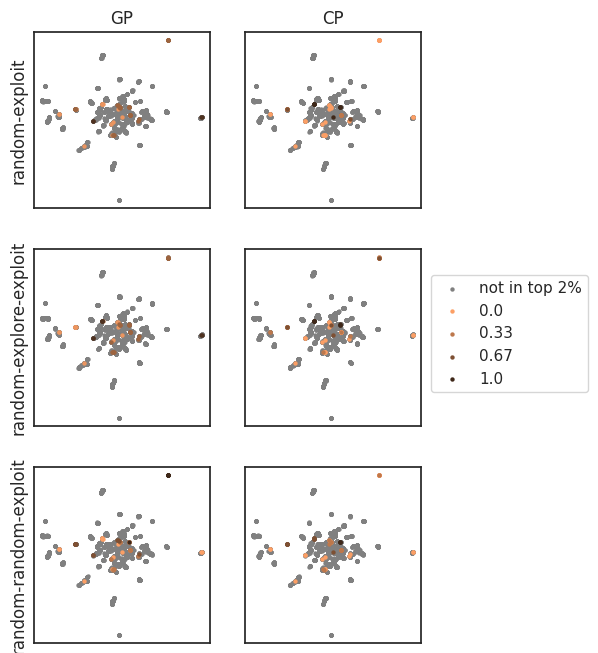

In [13]:
plot_all_protocols("D2R")

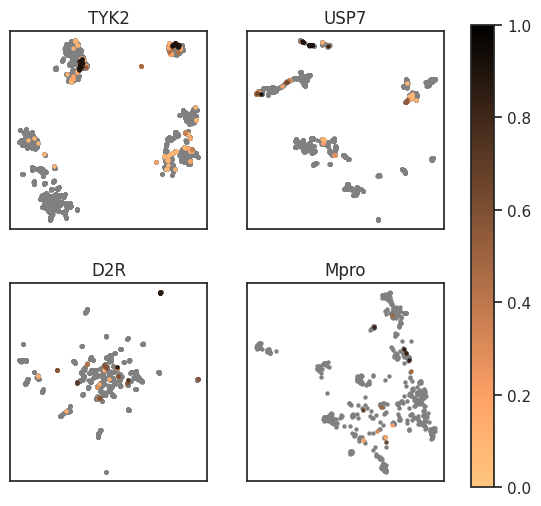

In [80]:
plot_all_datasets("GP")

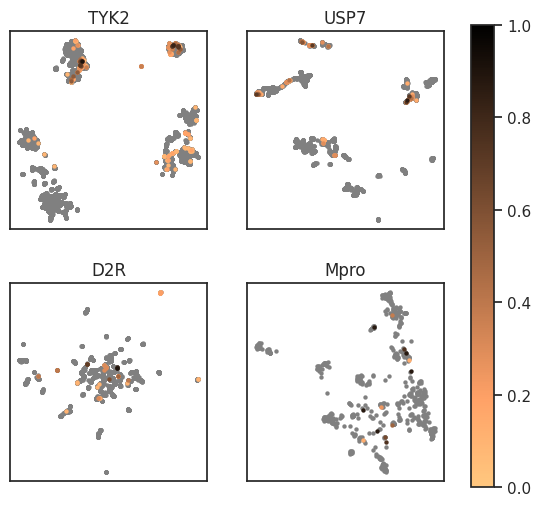

In [81]:
plot_all_datasets("CP")